In [94]:
import numpy as np

In [95]:
# Stirling numbers of second kind
S = [[0 for i in range(10001)] for j in range(10001)]

# Combinations
C = [[0 for i in range(10001)] for j in range(10001)]

In [96]:
from scipy.special import factorial
from decimal import Decimal
import decimal
import math

def stirling(n,k,S):
#     print(n,k)
    if S[n][k] > 0: return S[n][k]
    if k>n or k==0 or n==0: return 0
    if k==1 or k==n:
        S[n][k]=1
    else:
        S[n][k] = Decimal(S[n-1][k-1] + k*S[n-1][k])
    return S[n][k]

def combs(n,k,C,S):
    if C[n][k] > 0: return C[n][k]
    if k>n or k==0 or n==0: return 0
    c = Decimal(math.factorial(n)) / Decimal(math.factorial(n-k))
    C[n][k] = Decimal(c*stirling(n,k,S))
    return C[n][k]

def H(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(C[n][k] * Decimal((z**k)))
    return h

# Numerator in Expected no. of colors
def H_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(k * C[n][k] * Decimal((z**k)))
    return h

# Numerator in Expected no. of colors squared
def H_t_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal((k**2) * C[n][k] * Decimal((z**k)))
    return h

def E_cols(n,z,C):
    return Decimal(H_t(n,z,C)/H(n,z,C))

def Var_cols(n,z,C):
    EX_2 = Decimal(H_t_t(n,z,C)/H(n,z,C))
    v = Decimal(EX_2 - (E_cols(n,z,C)**2))
    if v < 0:
        # print("Negative variance in",n,z,C)
        v = 0
    return v

def std_cols(n,z,C):
    return float(Var_cols(n,z,C))**(0.5)

In [5]:
for i in range(2501):
    if i%100==0: print(i)
    for j in range(2501):
        stirling(i,j,S)
        combs(i,j,C,S)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [140]:
import pickle

# with open(r"Stirling_2500_.pickle", "wb") as f:
#     pickle.dump(S, f)
# with open(r"Combs_2500_.pickle", "wb") as f:
#     pickle.dump(C, f)

with open(r"Stirling_4000.pickle", "rb") as f:
    S = pickle.load(f)
# with open(r"Combs_4000.pickle", "rb") as f:
#     C = pickle.load(f)

In [113]:
print("C(4,2):", C[4][2]) #84
print("C(4,.):", C[4][:10])
print ("sum of C(4,.):", sum(C[4]))
print ("H(4,1):", H(4,1,C))
print ("H_t(4,1):", H_t(4,1,C))
print ("H_t_t(4,1):", H_t_t(4,1,C))
print ("E_cols(4,1):", E_cols(4,1,C))
print ("Var_cols(4,1):", Var_cols(4,1,C))
print ("std_cols(4,1):", std_cols(4,1,C))

C(4,2): 84
C(4,.): [0, Decimal('4'), Decimal('84'), Decimal('144'), Decimal('24'), 0, 0, 0, 0, 0]
sum of C(4,.): 256
H(4,1): 256
H_t(4,1): 700
H_t_t(4,1): 2020
E_cols(4,1): 2.734375
Var_cols(4,1): 0.413818359375
std_cols(4,1): 0.6432871515699656


In [136]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_expected_colors (N, save=False):
    max_gamma = int(N)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [E_cols(N,zz,C) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(gammas, y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    if save: plt.savefig("Expected_no_colors/aprox_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_std_colors (N, trunc=False,save=False):
    max_gamma = int(N)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [float(std_cols(N,zz,C)) for zz in z]
    peaks, _ = find_peaks(y, height=0.1)
    print("Peak locations", peaks)
    print()
    pk_gammas = np.array([gammas[pk] for pk in peaks])
    print("Normalized peaks", pk_gammas/pk_gammas[-1])
    print()
    ypeaks = [y[pk] for pk in peaks]
    f = plt.figure(figsize=(18, 5))
    if trunc:
        gammas = gammas[peaks[0]:]
        y = y[peaks[0]:]
        ypeaks = [y[pk-peaks[0]] for pk in peaks]
    plt.plot(gammas, y)
    plt.plot(peaks, ypeaks, "|", c="red", ms=20)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Std. num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    trunc_s = 'trunc' if trunc else ''
    if save: plt.savefig("Expected_no_colors/std_aprox_(" + str(N)+","+str(N)+")_vary_gamma_" + trunc_s + ".png", format="png")
    plt.show()
    
def plot_avg_std_colors (N, trunc=False, save=False):
    max_gamma = int(N)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [float(E_cols(N,zz,C)) for zz in z]
    yerr = [float(std_cols(N,zz,C)) for zz in z]
    peaks, _ = find_peaks(yerr, height=0.1)
    print("Peak locations", peaks)
    print()
    pk_gammas = np.array([gammas[pk] for pk in peaks])
    print("Normalized peaks", pk_gammas/pk_gammas[-1])
    print()
    print("Expectation at peak and peak+10", [(y[pk], y[pk+10]) for pk in peaks])
    print("Std. at peak and peak+10", [(yerr[pk], yerr[pk+10]) for pk in peaks])
    ypeaks = [y[pk] for pk in peaks]
    f = plt.figure(figsize=(18, 5))
    if trunc:
        gammas = gammas[peaks[0]:]
        y = y[peaks[0]:]
        ypeaks = [y[pk-peaks[0]] for pk in peaks]
    plt.plot(gammas, y)
    plt.plot(peaks, ypeaks, "|", c="red", ms=20)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Expected num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    trunc_s = 'trunc' if trunc else ''
    if save: plt.savefig("Expected_no_colors/avg_std_aprox(" + str(N)+","+str(N)+")_vary_gamma_" + trunc_s + ".png", format="png")
    plt.show()

16 [13]
[1.]



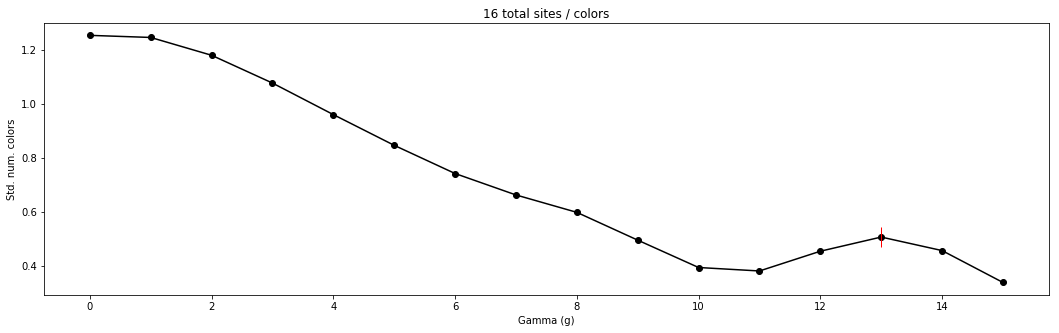

25 [12 20]
[0.6 1. ]



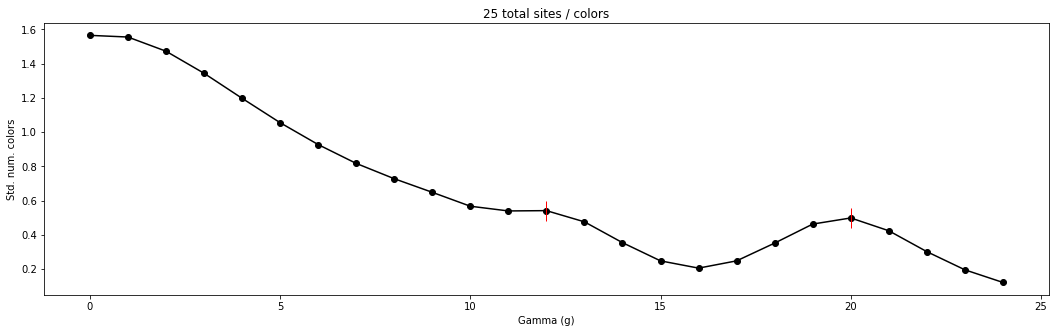

36 [17 28]
[0.60714286 1.        ]



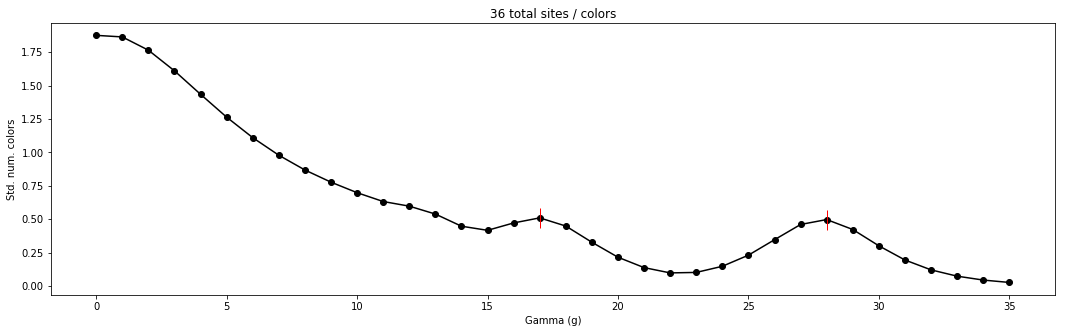

49 [16 23 37]
[0.43243243 0.62162162 1.        ]



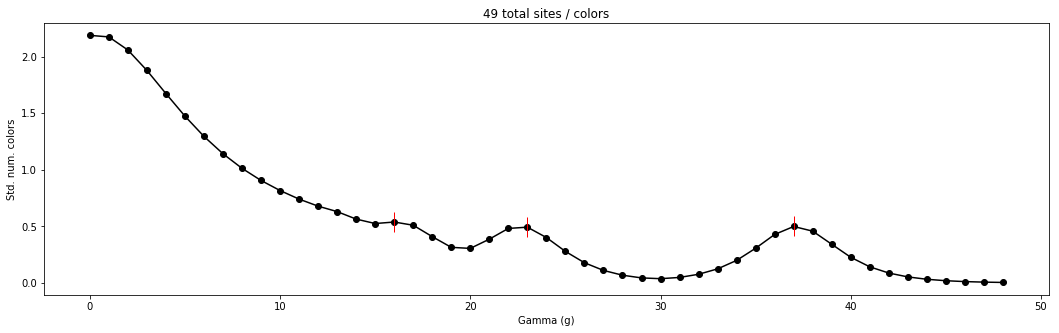

64 [21 29 48]
[0.4375     0.60416667 1.        ]



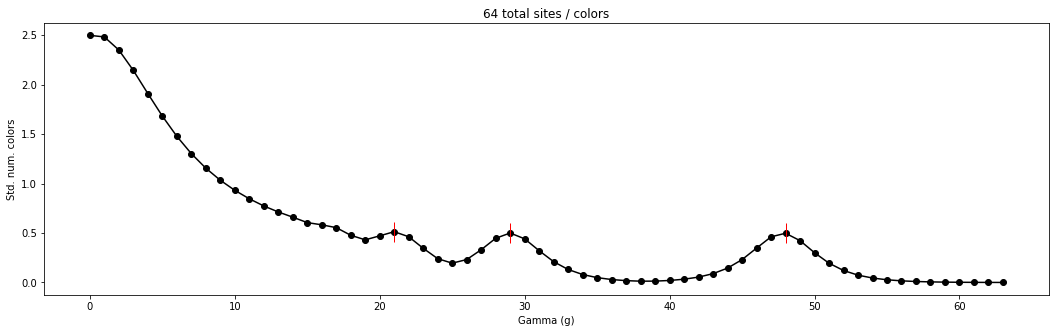

81 [20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]



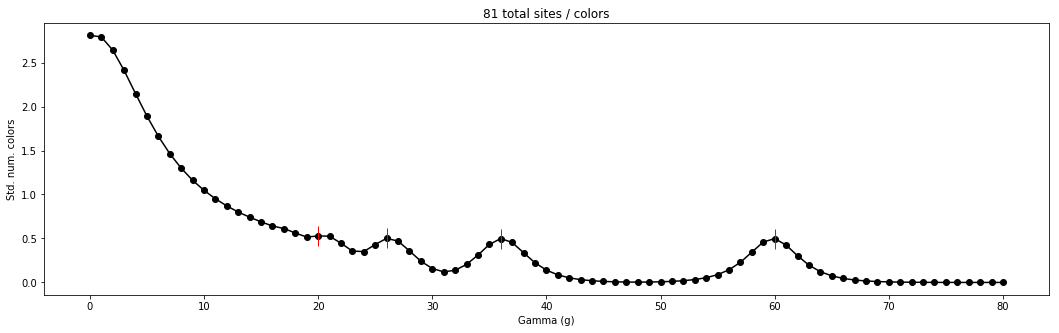

100 [25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]



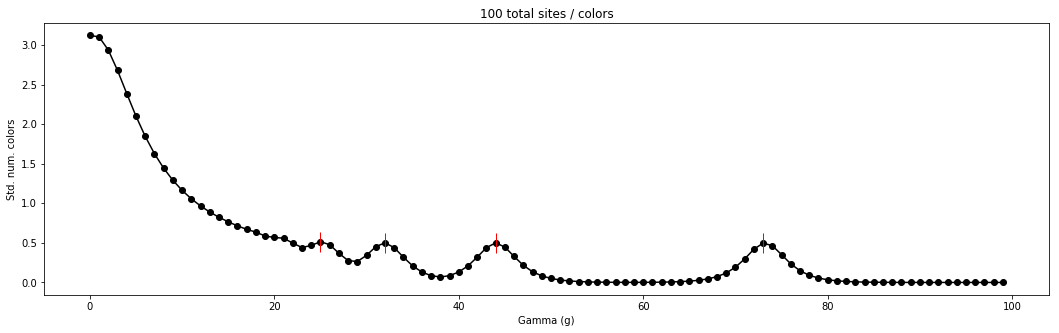

121 [25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



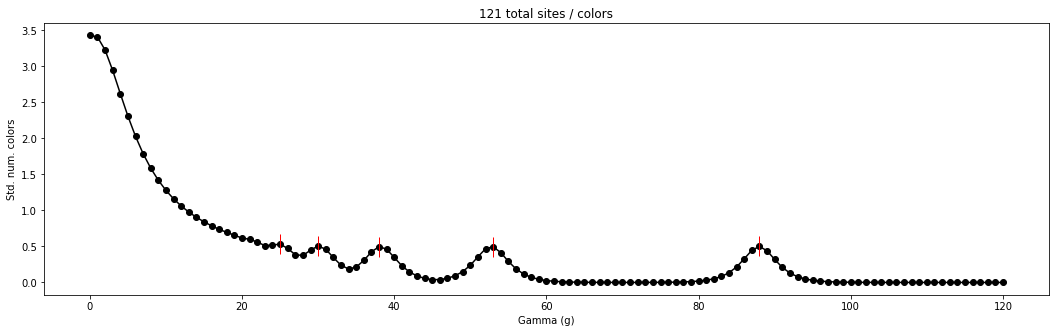

144 [ 25  29  35  45  62 104]
[0.24038462 0.27884615 0.33653846 0.43269231 0.59615385 1.        ]



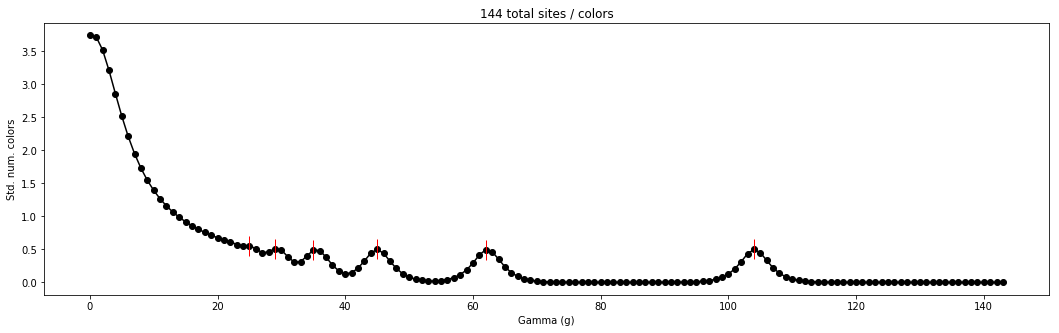

200 [ 30  34  40  48  61  85 143]
[0.20979021 0.23776224 0.27972028 0.33566434 0.42657343 0.59440559
 1.        ]



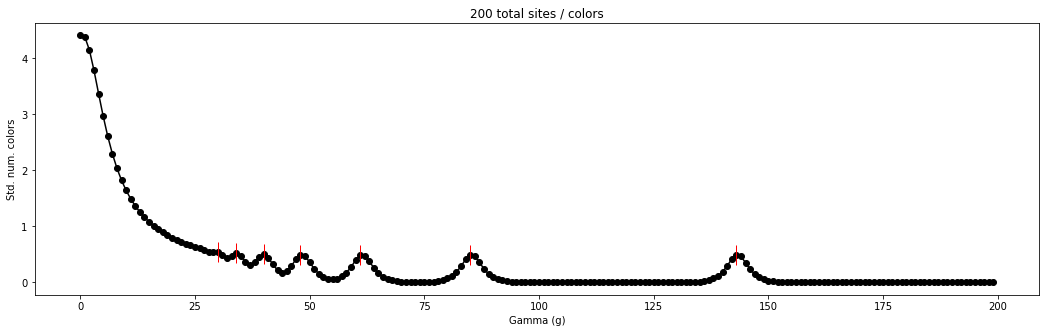

In [216]:
plot_std_colors(16)
plot_std_colors(25)
plot_std_colors(36)
plot_std_colors(49)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plot_std_colors(144)
plot_std_colors(200)

Peak locations [ 35  39  44  50  59  71  91 126 213]

Normalized peaks [0.16431925 0.18309859 0.20657277 0.23474178 0.27699531 0.33333333
 0.42723005 0.5915493  1.        ]



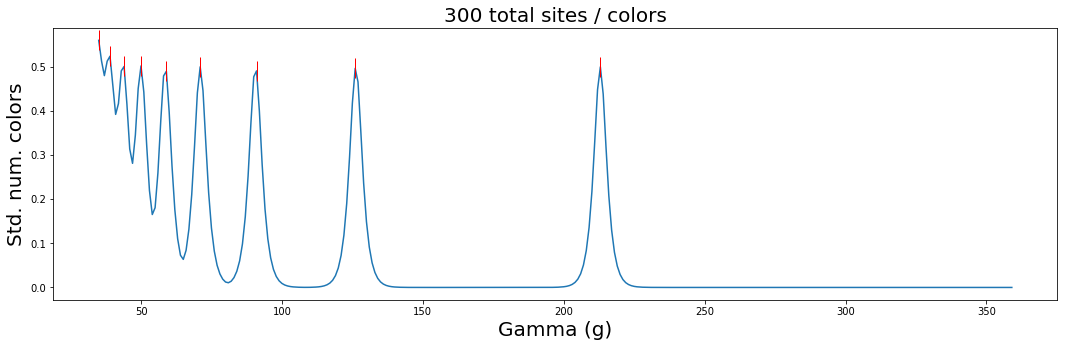

Peak locations [ 35  39  44  50  59  71  91 126 213]

Normalized peaks [0.16431925 0.18309859 0.20657277 0.23474178 0.27699531 0.33333333
 0.42723005 0.5915493  1.        ]

Expectation at peak and peak+10 [(9.51013399696675, 7.201775130110406), (8.458757706578652, 6.732071645939889), (7.417441743251025, 6.007654596912468), (6.49689320146642, 5.196499773274769), (5.399388219232249, 4.883322406384312), (4.505999531960831, 3.9999795875500466), (3.4042131861003675, 3.000030800746126), (2.559224081768595, 2.000057596775764), (1.4878650236701418, 1.0000432465677254)]
Std. at peak and peak+10 [(0.5599780595353038, 0.41558642822953745), (0.5240257905308908, 0.45070714685261815), (0.5007572499624793, 0.16526906121427445), (0.5019215425938781, 0.3974057801524347), (0.4898789198236593, 0.3211187439732426), (0.4999681410551373, 0.01064921067823541), (0.4907391241685354, 0.005549758493135912), (0.49648011857341, 0.007589035404810147), (0.49985272065826925, 0.006576070061948847)]


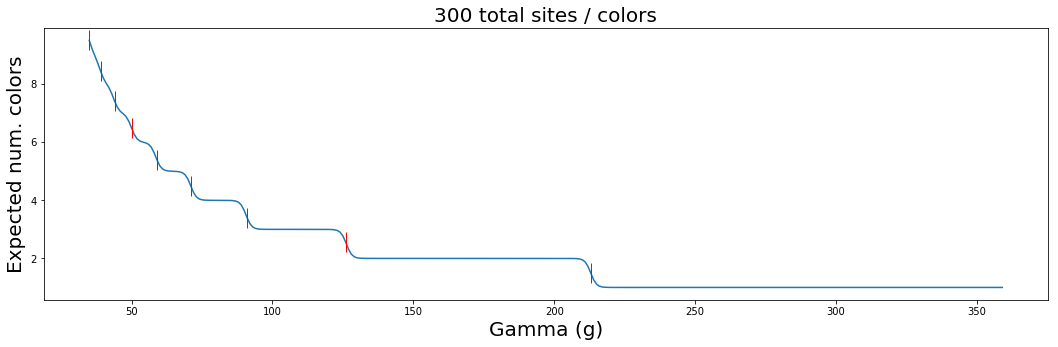

In [88]:
plot_std_colors(300, trunc=True)
plot_avg_std_colors(300, trunc=True)

Peak locations [ 29  33  38  44  53  65  85 121 207]

Normalized peaks [0.14009662 0.15942029 0.18357488 0.21256039 0.25603865 0.31400966
 0.41062802 0.58454106 1.        ]



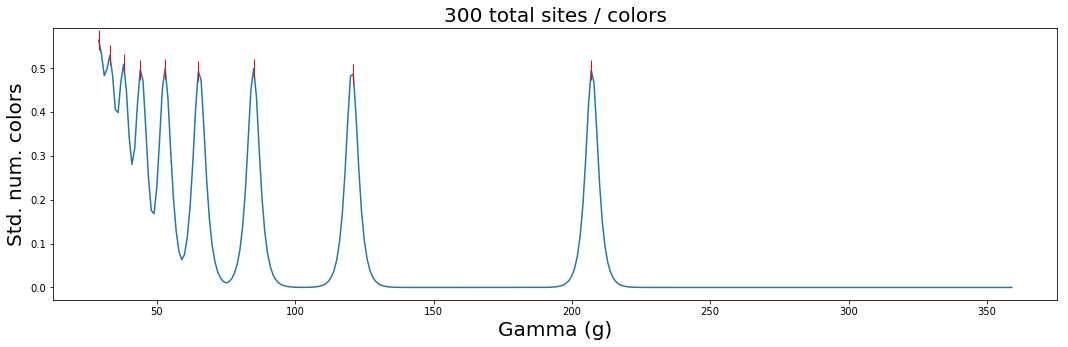

Peak locations [ 29  33  38  44  53  65  85 121 207]

Normalized peaks [0.14009662 0.15942029 0.18357488 0.21256039 0.25603865 0.31400966
 0.41062802 0.58454106 1.        ]

Expectation at peak and peak+10 [(9.613571023302912, 7.261701309619645), (8.548726492572543, 6.791966207833696), (7.499348298026095, 6.0167584016438385), (6.576165455141625, 5.250638626917448), (5.4763122846396, 4.911664973377527), (4.58264634767609, 4.000014114269152), (3.4795931879388298, 3.000041837618571), (2.3872041302279987, 2.0000286857939398), (1.5624243392733077, 1.0000583499903701)]
Std. at peak and peak+10 [(0.5638478229945375, 0.4494723956417162), (0.5292918365321808, 0.4184534249841616), (0.5093815253006648, 0.17561782887935912), (0.49709240306721464, 0.43343688307934614), (0.4996018738655164, 0.2839140689656065), (0.49312887974633085, 0.010612725730282007), (0.49958339121860373, 0.006468066508258155), (0.48711096452695235, 0.005355835235041), (0.4960878973189035, 0.007638493676680674)]


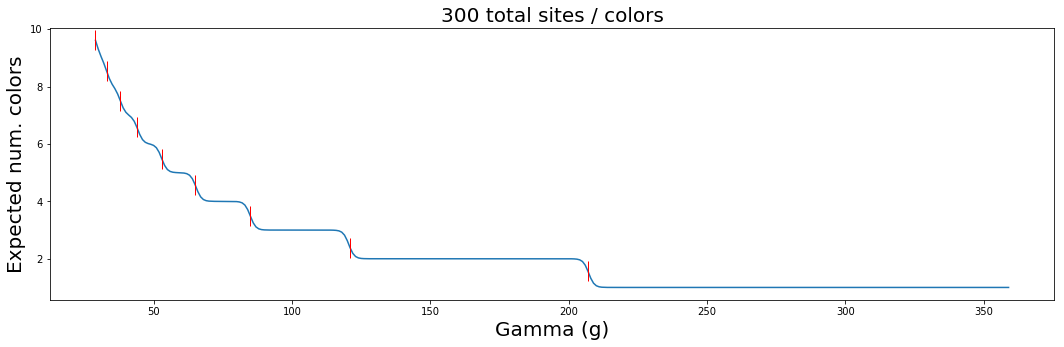

In [122]:
plot_std_colors_S(300, trunc=True, save=True)
plot_avg_std_colors_S(300, trunc=True, save=True)

Peak locations [ 43  47  51  57  63  71  81  96 116 149 208 352]

Normalized peaks [0.12215909 0.13352273 0.14488636 0.16193182 0.17897727 0.20170455
 0.23011364 0.27272727 0.32954545 0.42329545 0.59090909 1.        ]



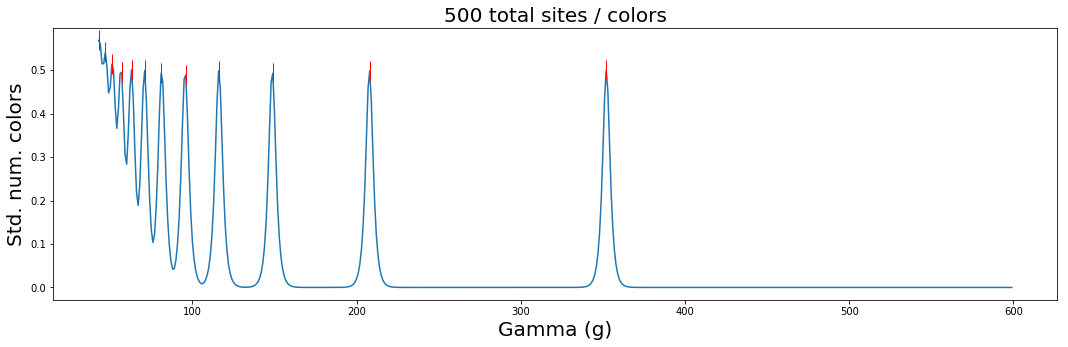

Peak locations [ 43  47  51  57  63  71  81  96 116 149 208 352]

Normalized peaks [0.12215909 0.13352273 0.14488636 0.16193182 0.17897727 0.20170455
 0.23011364 0.27272727 0.32954545 0.42329545 0.59090909 1.        ]

Expectation at peak and peak+10 [(12.724565052718386, 10.149723699244092), (11.57257588447265, 9.395250058695504), (10.627644909143237, 8.88069798785601), (9.395250058695504, 7.996087290341482), (8.47409607000559, 7.107587457290769), (7.4719130916826115, 6.582270636923755), (6.582270636923755, 5.98984771925631), (5.394981003630551, 4.999991295523797), (4.542128300062526, 4.000053751297334), (3.4166190595417802, 3.000032421118862), (2.461213542629303, 2.0000388618689713), (1.5232455292655926, 1.0000498246542722)]
Std. at peak and peak+10 [(0.5687534879356538, 0.41658586362953964), (0.5411558041631945, 0.4954013495074581), (0.513758906502673, 0.3544954208183781), (0.4954013495074581, 0.18876927701481366), (0.5012537867890192, 0.3105649512528946), (0.49952958058356994, 0.49

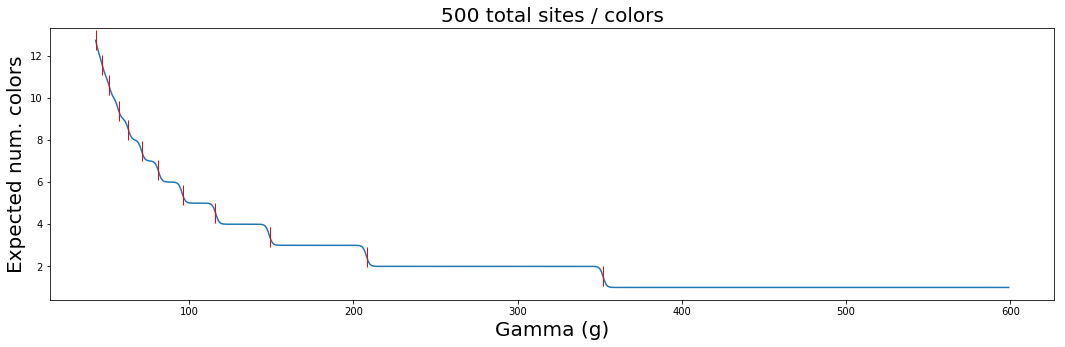

In [89]:
plot_std_colors(500, trunc=True)
plot_avg_std_colors(500, trunc=True)

Peak locations [ 37  41  45  50  57  65  75  89 110 142 202 346]

Normalized peaks [0.10693642 0.11849711 0.1300578  0.14450867 0.16473988 0.18786127
 0.21676301 0.25722543 0.31791908 0.41040462 0.58381503 1.        ]



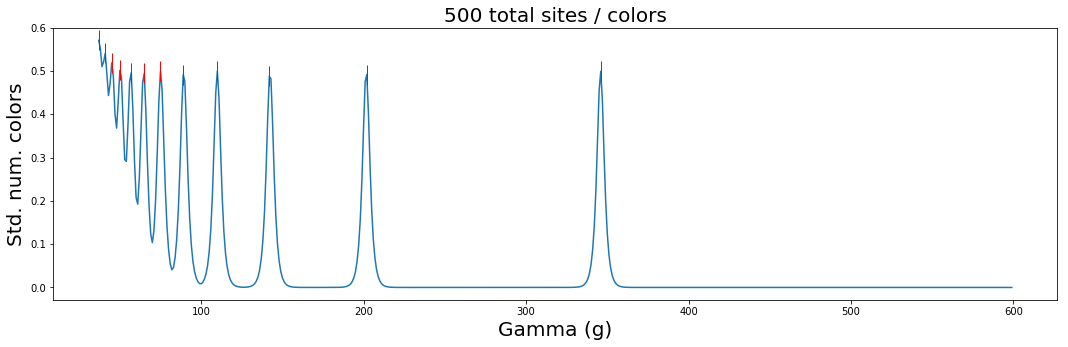

Peak locations [ 37  41  45  50  57  65  75  89 110 142 202 346]

Normalized peaks [0.10693642 0.11849711 0.1300578  0.14450867 0.16473988 0.18786127
 0.21676301 0.25722543 0.31791908 0.41040462 0.58381503 1.        ]

Expectation at peak and peak+10 [(12.662884816915204, 10.117215322719433), (11.516287924975734, 9.348149680400256), (10.575805933656401, 8.85428530928183), (9.599747431385154, 8.026252091108809), (8.424675316501677, 7.089704443272718), (7.422332647377573, 6.532337850814514), (6.532337850814514, 5.987546366890384), (5.591222683303403, 5.000048315868136), (4.490585549777259, 4.00004371977569), (3.6117660614990856, 3.0000715345740234), (2.4094938333235634, 2.0000314821538465), (1.4701463267179797, 1.000040282348649)]
Std. at peak and peak+10 [(0.5707453941708129, 0.40080597437423787), (0.5405236156560327, 0.48325861963780425), (0.5187433746528217, 0.3754668430574011), (0.5013358849563873, 0.20784751982993782), (0.4959658541800971, 0.2867051677245798), (0.49418872792181756, 

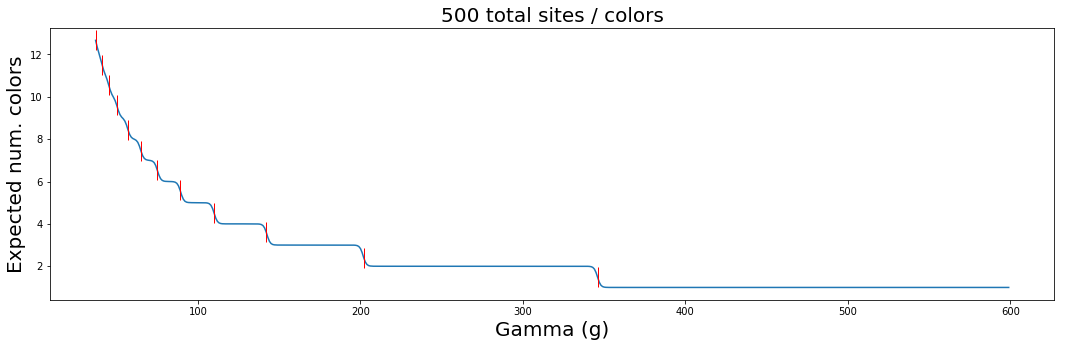

In [123]:
plot_std_colors_S(500, trunc=True, save=True)
plot_avg_std_colors_S(500, trunc=True, save=True)

Peak locations [ 48  52  56  61  67  75  84  97 114 139 178 249 422]

Normalized peaks [0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512
 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739
 1.        ]



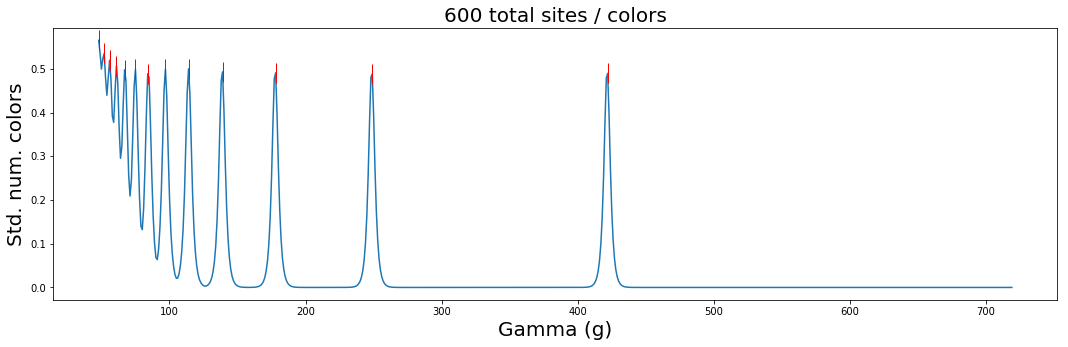

Peak locations [ 48  52  56  61  67  75  84  97 114 139 178 249 422]

Normalized peaks [0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512
 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739
 1.        ]

Expectation at peak and peak+10 [(13.576402832822085, 11.09074524142901), (12.462185929692504, 10.30016426971986), (11.53291963168341, 9.792587248363684), (10.54654724963338, 9.003314169513551), (9.57548731114905, 8.104325544381034), (8.46434575144406, 7.360006556837878), (7.60466931678352, 6.94944513171406), (6.482853495450428, 5.999121945400293), (5.49743405457581, 5.000044507502568), (4.417494694578211, 4.000032538094813), (3.4048892917090154, 3.0000308873246273), (2.3950922536588397, 2.000029651841631), (1.399013493846516, 1.0000301415063242)]
Std. at peak and peak+10 [(0.5652031599241212, 0.3919839958380019), (0.5351539642136068, 0.46762957020285384), (0.5200560079028008, 0.42059065316871114), (0.5074965347492618, 0.20917750775921398), (0.49798503132

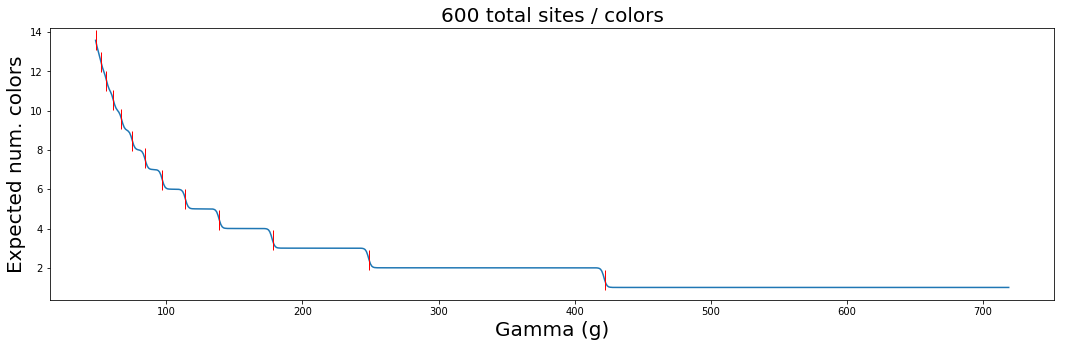

In [90]:
plot_std_colors(600, trunc=True)
plot_avg_std_colors(600, trunc=True)

700 [ 52  56  60  65  71  78  87  98 113 132 161 207 289 491]
[0.10590631 0.11405295 0.12219959 0.13238289 0.14460285 0.15885947
 0.17718941 0.19959267 0.23014257 0.2688391  0.32790224 0.42158859
 0.5885947  1.        ]



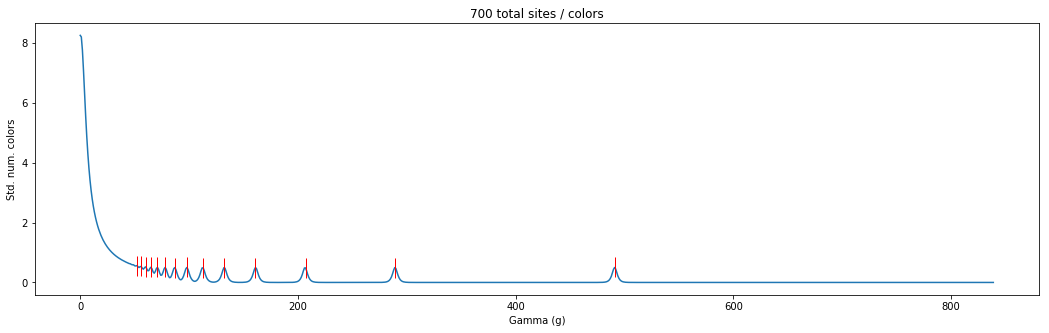

In [239]:
plot_std_colors(700)

800 [ 52  55  59  63  68  74  81  89  99 111 128 151 184 235 330 561]
[0.09269162 0.09803922 0.10516934 0.11229947 0.12121212 0.13190731
 0.14438503 0.15864528 0.17647059 0.19786096 0.22816399 0.26916221
 0.32798574 0.41889483 0.58823529 1.        ]



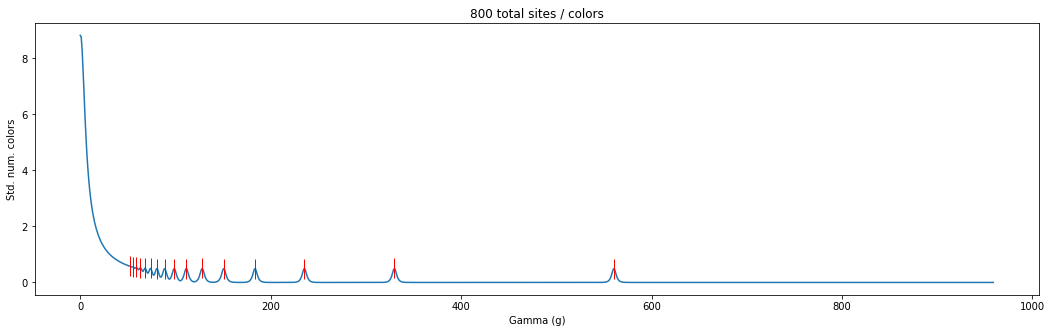

In [241]:
plot_std_colors(800)

900 [ 55  58  62  66  71  76  83  90  99 111 125 144 169 206 264 371 630]
[0.08730159 0.09206349 0.0984127  0.1047619  0.11269841 0.12063492
 0.13174603 0.14285714 0.15714286 0.17619048 0.1984127  0.22857143
 0.26825397 0.32698413 0.41904762 0.58888889 1.        ]



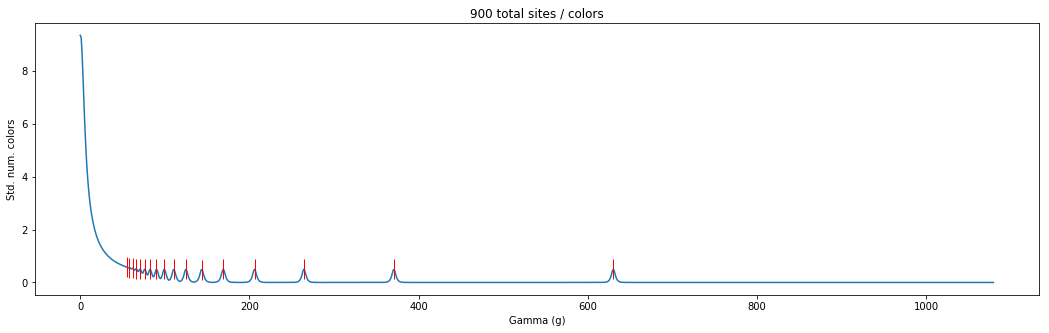

In [242]:
plot_std_colors(900)

1000 [ 58  61  65  69  73  78  84  91 100 110 122 138 159 187 228 293 411 699]
[0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798
 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489
 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]



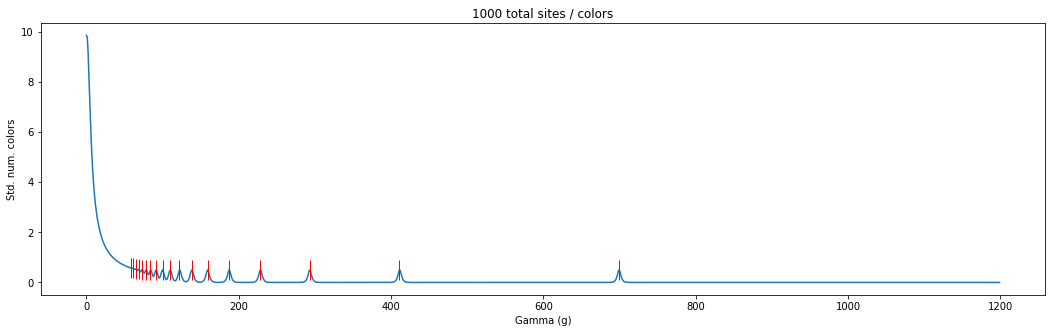

In [249]:
plot_std_colors(1000)

Peak locations [ 58  61  65  69  73  78  84  91 100 110 122 138 159 187 228 293 411 699]

Normalized peaks [0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798
 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489
 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]



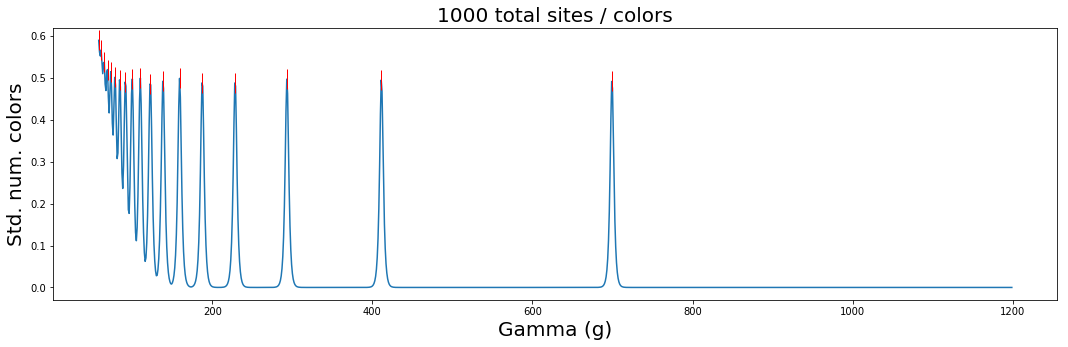

Peak locations [ 58  61  65  69  73  78  84  91 100 110 122 138 159 187 228 293 411 699]

Normalized peaks [0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798
 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489
 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]

Expectation at peak and peak+10 [(18.516141893931366, 15.687126581511402), (17.56083584976277, 14.986095513322102), (16.414674668412985, 14.106739226159899), (15.41162755777898, 13.343680310060982), (14.551462982855892, 12.807082125298479), (13.595466087746845, 11.994336863631498), (12.59486940164922, 11.067678981206342), (11.605261888640856, 10.233163763726226), (10.452734034941066, 9.4891878418194), (9.4891878418194, 8.923164683475061), (8.619058818840601, 7.998334731624124), (7.587267895413185, 7.000049580315841), (6.526601580073533, 6.000050489794976), (5.60648004835935, 5.0000699639880395), (4.607749150801597, 4.0000703372040824), (3.5499648956283907, 3.0000554778553923), (2.5

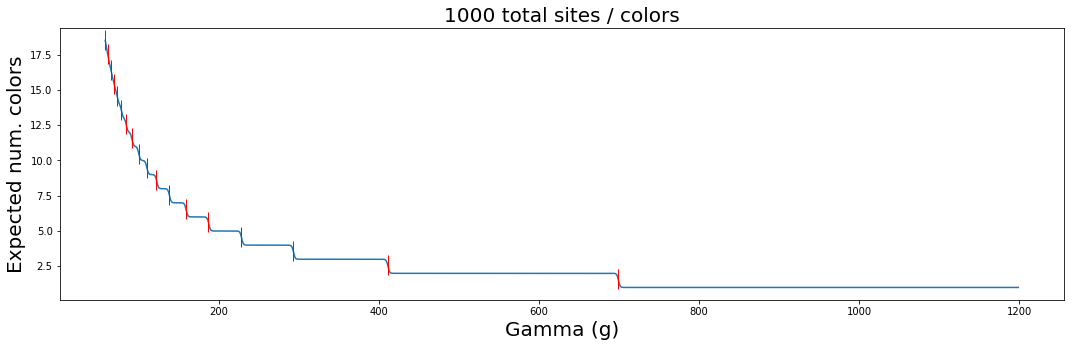

In [91]:
plot_std_colors(1000, trunc=True)
plot_avg_std_colors(1000, trunc=True)

Peak locations [ 51  54  58  62  66  71  77  85  93 103 116 131 152 181 222 286 404 692]

Normalized peaks [0.07369942 0.07803468 0.08381503 0.08959538 0.09537572 0.10260116
 0.11127168 0.12283237 0.13439306 0.14884393 0.16763006 0.18930636
 0.21965318 0.26156069 0.32080925 0.4132948  0.58381503 1.        ]



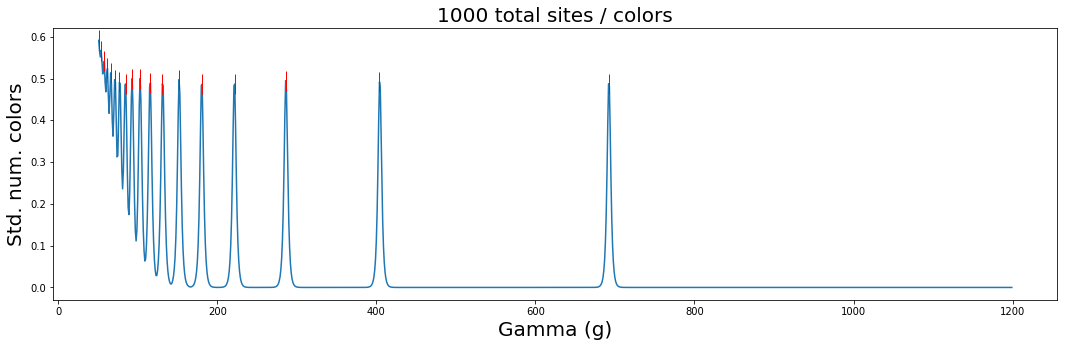

Peak locations [ 51  54  58  62  66  71  77  85  93 103 116 131 152 181 222 286 404 692]

Normalized peaks [0.07369942 0.07803468 0.08381503 0.08959538 0.09537572 0.10260116
 0.11127168 0.12283237 0.13439306 0.14884393 0.16763006 0.18930636
 0.21965318 0.26156069 0.32080925 0.4132948  0.58381503 1.        ]

Expectation at peak and peak+10 [(18.55469222078212, 15.715395893300167), (17.596030041638105, 15.00464333264446), (16.4462536179155, 14.123392124553513), (15.440912850861153, 13.368652961043496), (14.579623527567112, 12.824475293872194), (13.621763374423233, 12.000121359832177), (12.620258239611768, 11.075062784489454), (11.383804392325398, 10.109989809450367), (10.478204131528187, 9.514507860616808), (9.514507860616808, 8.929990671429595), (8.397909486113585, 7.9957603797125705), (7.611103192314478, 7.000057726284578), (6.551014289881603, 6.00005570464704), (5.384568274211869, 5.000028368503892), (4.38559029157229, 4.000028491205711), (3.573410113042333, 3.000061021583239), (2.59

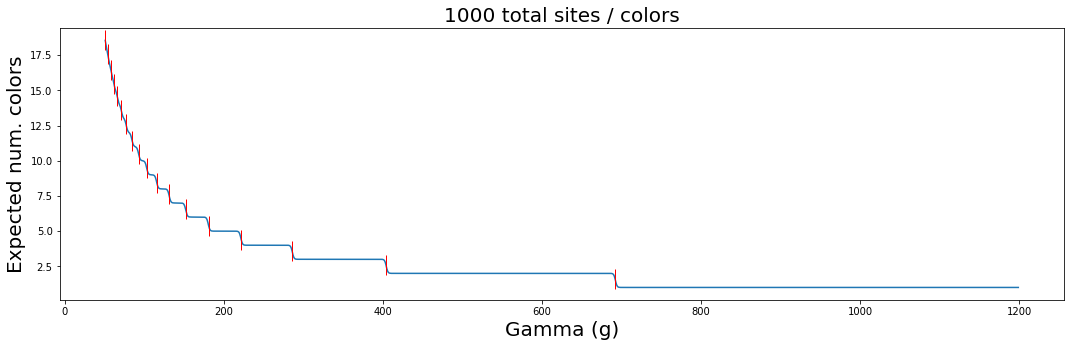

In [124]:
plot_std_colors_S(1000, trunc=True, save=True)
plot_avg_std_colors_S(1000, trunc=True, save=True)

1200 [ 62  65  69  73  77  82  87  93 101 109 119 131 146 165 190 224 273 351
 493 838]
[0.07398568 0.07756563 0.0823389  0.08711217 0.09188544 0.09785203
 0.10381862 0.11097852 0.12052506 0.1300716  0.14200477 0.15632458
 0.17422434 0.19689737 0.22673031 0.2673031  0.32577566 0.41885442
 0.58830549 1.        ]



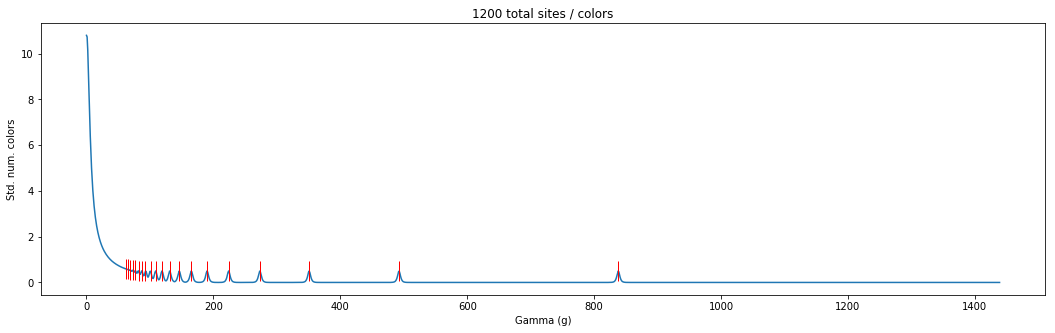

In [250]:
plot_std_colors(1200)

1400 [ 66  69  72  76  80  84  89  95 101 108 117 127 138 152 170 192 221 261
 318 409 574 977]
[0.06755374 0.07062436 0.07369498 0.07778915 0.08188332 0.08597748
 0.09109519 0.09723644 0.10337769 0.11054248 0.11975435 0.12998976
 0.14124872 0.1555783  0.17400205 0.19651996 0.22620266 0.26714432
 0.32548618 0.41862845 0.58751279 1.        ]



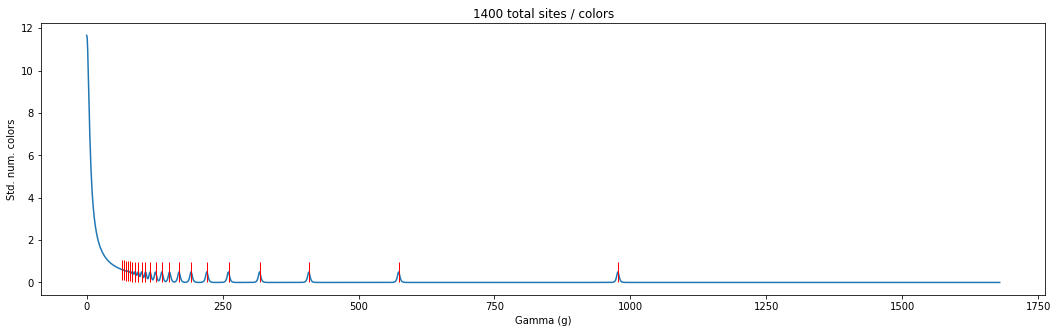

In [251]:
plot_std_colors(1400)

1600 [  72   75   79   82   86   91   96  102  108  115  123  133  144  157
  174  194  219  252  297  363  466  655 1116]
[0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122
 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563
 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645
 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]



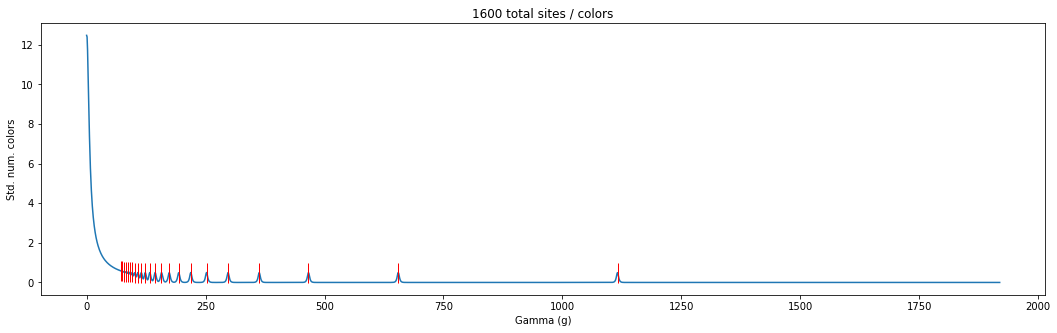

In [252]:
plot_std_colors(1600)

Peak locations [  72   75   79   82   86   91   96  102  108  115  123  133  144  157
  174  194  219  252  297  363  466  655 1116]

Normalized peaks [0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122
 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563
 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645
 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]



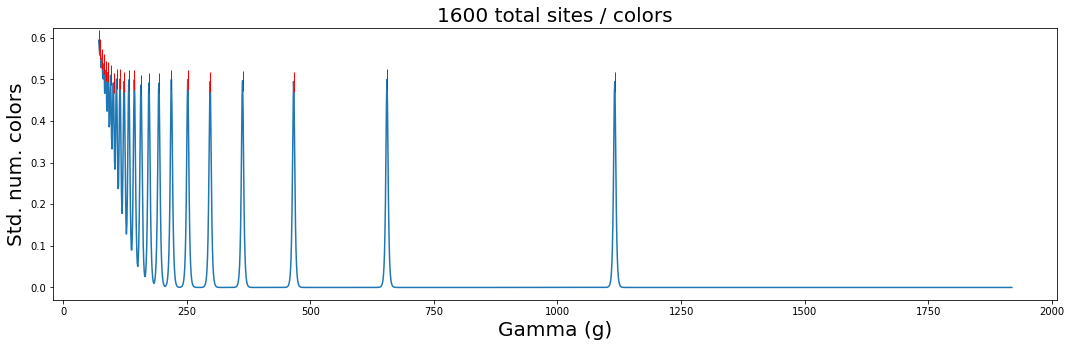

Peak locations [  72   75   79   82   86   91   96  102  108  115  123  133  144  157
  174  194  219  252  297  363  466  655 1116]

Normalized peaks [0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122
 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563
 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645
 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]

Expectation at peak and peak+10 [(23.60847759280286, 20.617894795596108), (22.624000826790603, 19.874211087132252), (21.416990518014302, 18.944357836361842), (20.617894795596108, 18.23892639127826), (19.626011668921397, 17.484109099198495), (18.484491251765622, 16.635160946679267), (17.484109099198495, 15.876134680695136), (16.3845450569968, 14.970373386036192), (15.464834464354274, 14.044777873637251), (14.512795902636904, 13.154538831818712), (13.575503117062244, 12.468477747334806), (12.468477747334806, 11.75107543771833), (11.526026049801766, 10.969868891424554), (10.615357858882

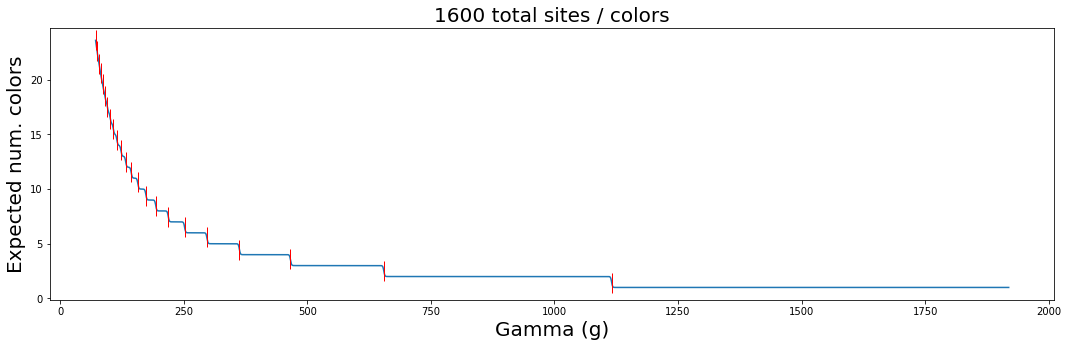

In [92]:
plot_std_colors(1600, trunc=True)
plot_avg_std_colors(1600, trunc=True)

Peak locations [  62   65   68   71   75   79   84   89   94  100  108  116  126  137
  150  166  186  212  245  290  355  459  648 1108]

Normalized peaks [0.05595668 0.05866426 0.06137184 0.06407942 0.06768953 0.07129964
 0.07581227 0.08032491 0.08483755 0.09025271 0.09747292 0.10469314
 0.11371841 0.12364621 0.13537906 0.14981949 0.16787004 0.19133574
 0.22111913 0.26173285 0.32039711 0.41425993 0.58483755 1.        ]



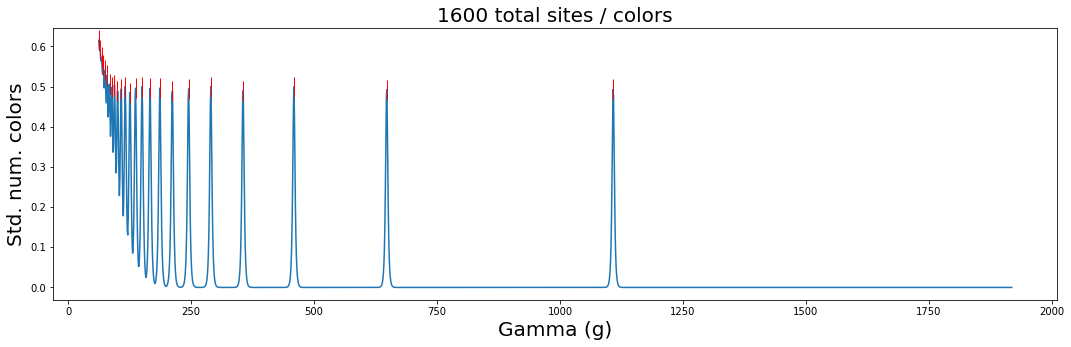

Peak locations [  62   65   68   71   75   79   84   89   94  100  108  116  126  137
  150  166  186  212  245  290  355  459  648 1108]

Normalized peaks [0.05595668 0.05866426 0.06137184 0.06407942 0.06768953 0.07129964
 0.07581227 0.08032491 0.08483755 0.09025271 0.09747292 0.10469314
 0.11371841 0.12364621 0.13537906 0.14981949 0.16787004 0.19133574
 0.22111913 0.26173285 0.32039711 0.41425993 0.58483755 1.        ]

Expectation at peak and peak+10 [(24.547045495547923, 21.3092191814393), (23.480558182765474, 20.511583942345887), (22.504215497474032, 19.78944063404102), (21.612412934741865, 19.05662088037559), (20.511583942345887, 18.166247456193783), (19.52500987088742, 17.390407508691805), (18.388274868699806, 16.543806266633865), (17.390407508691805, 15.823515626071446), (16.543806266633865, 15.004418622894311), (15.622096763911554, 14.086915934118425), (14.420876902461417, 13.111878514903985), (13.483552105671592, 12.37834337832464), (12.37834337832464, 11.675552567597428), (1

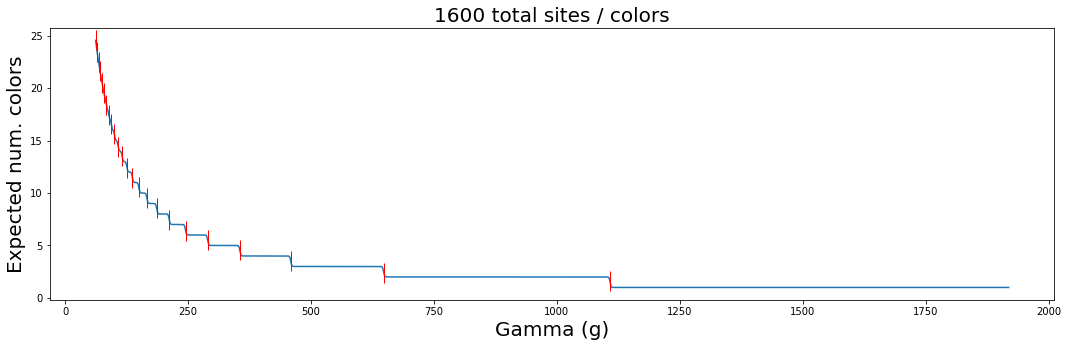

In [125]:
plot_std_colors_S(1600, trunc=True, save=True)
plot_avg_std_colors_S(1600, trunc=True, save=True)

1800 [  77   81   84   88   92   97  102  107  114  121  129  138  149  162
  177  195  217  246  283  334  408  524  736 1254]
[0.06140351 0.0645933  0.06698565 0.07017544 0.07336523 0.07735247
 0.08133971 0.08532695 0.09090909 0.09649123 0.10287081 0.11004785
 0.11881978 0.1291866  0.14114833 0.15550239 0.17304625 0.19617225
 0.22567783 0.26634769 0.32535885 0.41786284 0.58692185 1.        ]



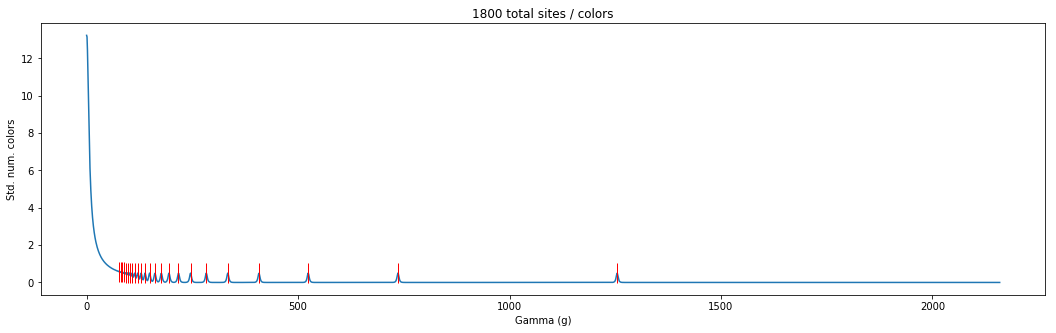

In [253]:
plot_std_colors(1800)

2000 [  77   83   86   89   93   97  102  107  113  119  126  134  143  153
  165  179  196  216  241  273  314  370  452  582  817 1393]
[0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388
 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526
 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102
 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033
 0.58650395 1.        ]



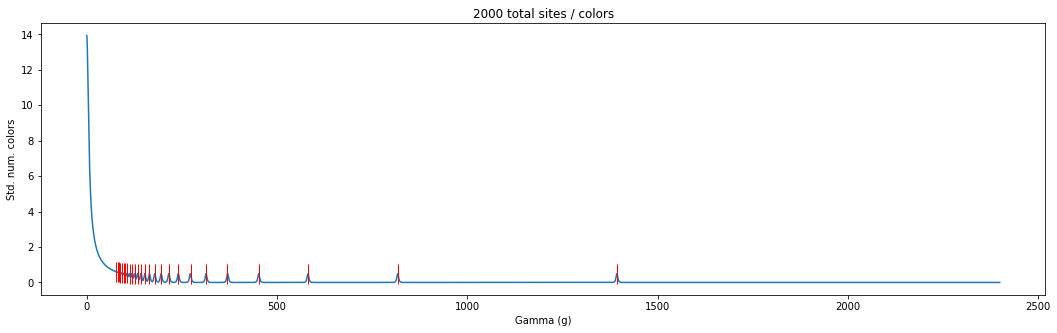

In [254]:
plot_std_colors(2000)

Peak locations [  77   83   86   89   93   97  102  107  113  119  126  134  143  153
  165  179  196  216  241  273  314  370  452  582  817 1393]

Normalized peaks [0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388
 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526
 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102
 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033
 0.58650395 1.        ]



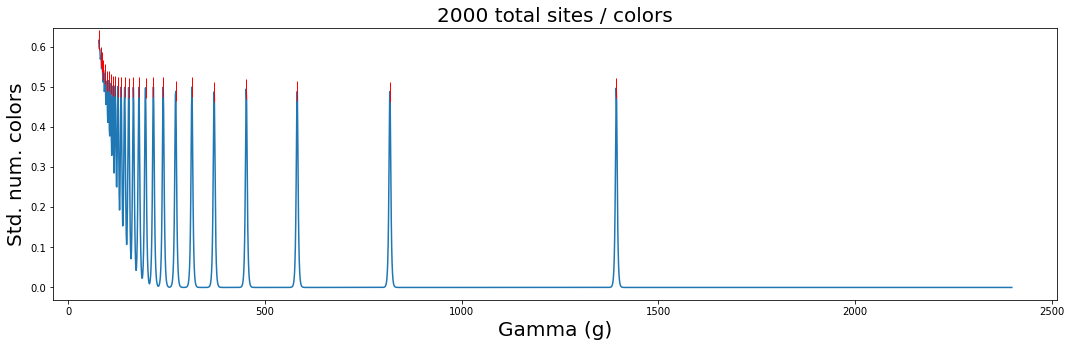

Peak locations [  77   83   86   89   93   97  102  107  113  119  126  134  143  153
  165  179  196  216  241  273  314  370  452  582  817 1393]

Normalized peaks [0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388
 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526
 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102
 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033
 0.58650395 1.        ]

Expectation at peak and peak+10 [(27.50601637057359, 24.20849590752566), (25.431601760685705, 22.60702494271115), (24.51128143714305, 21.888028585865158), (23.66430867595089, 21.148685750904317), (22.60702494271115, 20.282893575747586), (21.650403168217917, 19.549308569816333), (20.53657271080952, 18.692857469997506), (19.549308569816333, 17.897071058016227), (18.445792247862205, 16.971271158624337), (17.50553466079073, 16.040440717336235), (16.5026459925968, 15.107871688701998), (15.474615359014097, 14.244370896392915), (14.46798671282

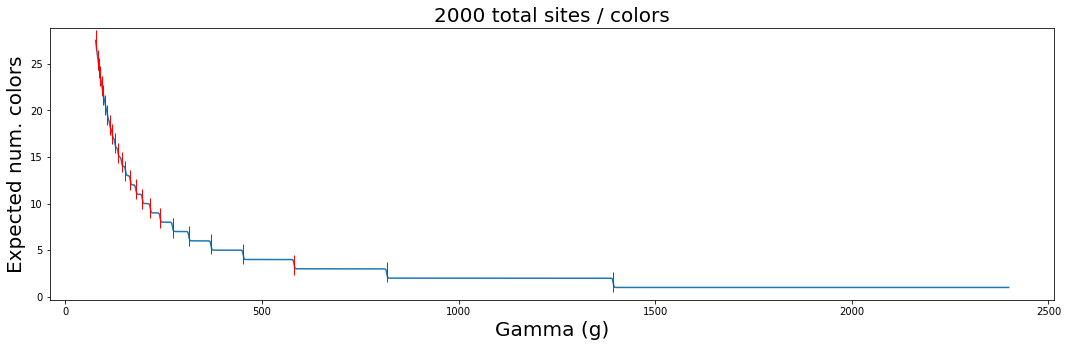

In [93]:
plot_std_colors(2000, trunc=True)
plot_avg_std_colors(2000, trunc=True)

Peak locations [  69   72   75   78   82   86   90   94  100  105  111  118  126  135
  146  158  172  188  208  233  265  306  363  445  574  810 1386]

Normalized peaks [0.04978355 0.05194805 0.05411255 0.05627706 0.05916306 0.06204906
 0.06493506 0.06782107 0.07215007 0.07575758 0.08008658 0.08513709
 0.09090909 0.0974026  0.10533911 0.11399711 0.12409812 0.13564214
 0.15007215 0.16810967 0.19119769 0.22077922 0.26190476 0.32106782
 0.41414141 0.58441558 1.        ]



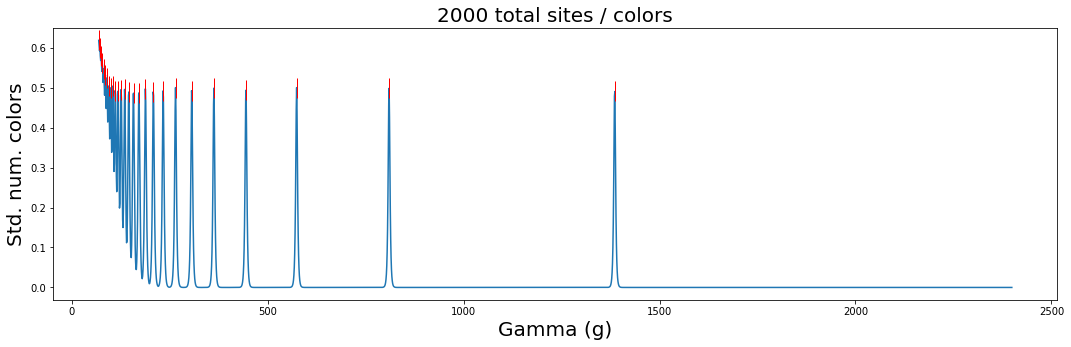

Peak locations [  69   72   75   78   82   86   90   94  100  105  111  118  126  135
  146  158  172  188  208  233  265  306  363  445  574  810 1386]

Normalized peaks [0.04978355 0.05194805 0.05411255 0.05627706 0.05916306 0.06204906
 0.06493506 0.06782107 0.07215007 0.07575758 0.08008658 0.08513709
 0.09090909 0.0974026  0.10533911 0.11399711 0.12409812 0.13564214
 0.15007215 0.16810967 0.19119769 0.22077922 0.26190476 0.32106782
 0.41414141 0.58441558 1.        ]

Expectation at peak and peak+10 [(27.663490968129132, 24.328401672362844), (26.574897113361068, 23.488189520709145), (25.569511419266426, 22.720363918536485), (24.64147752300303, 21.971994231472088), (23.488189520709145, 21.04124883248775), (22.438729544430785, 20.162597809390594), (21.489754828343553, 19.397149525003783), (20.643472982231817, 18.777896059688683), (19.397149525003783, 17.814062852968096), (18.54977612552896, 16.995490589705014), (17.607171201019177, 16.06526445268251), (16.60355056782285, 15.15439372486

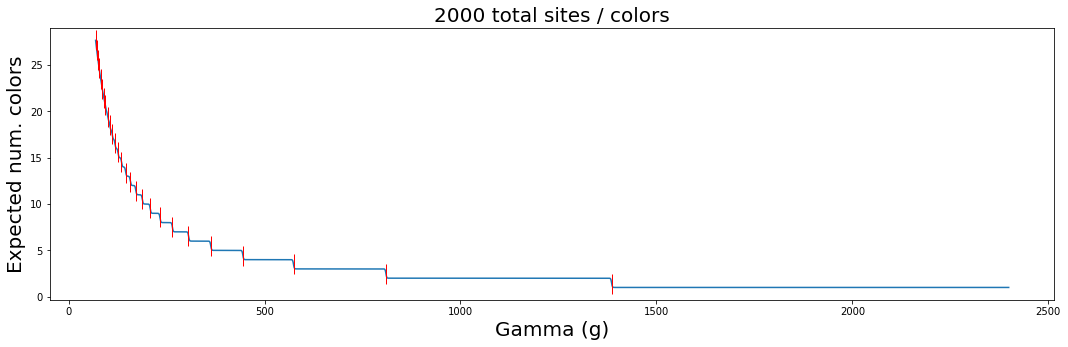

In [126]:
plot_std_colors_S(2000, trunc=True, save=True)
plot_avg_std_colors_S(2000, trunc=True, save=True)

Peak locations [  94   97  100  103  106  110  114  118  122  127  132  138  144  151
  159  167  177  187  199  212  228  246  267  292  322  359  407  469
  553  676  870 1223 2087]

Normalized peaks [0.04504073 0.0464782  0.04791567 0.04935314 0.05079061 0.05270724
 0.05462386 0.05654049 0.05845712 0.0608529  0.06324868 0.06612362
 0.06899856 0.07235266 0.07618591 0.08001917 0.08481073 0.0896023
 0.09535218 0.10158122 0.10924772 0.11787254 0.12793483 0.13991375
 0.15428845 0.17201725 0.19501677 0.22472448 0.26497365 0.32390992
 0.41686632 0.58600862 1.        ]



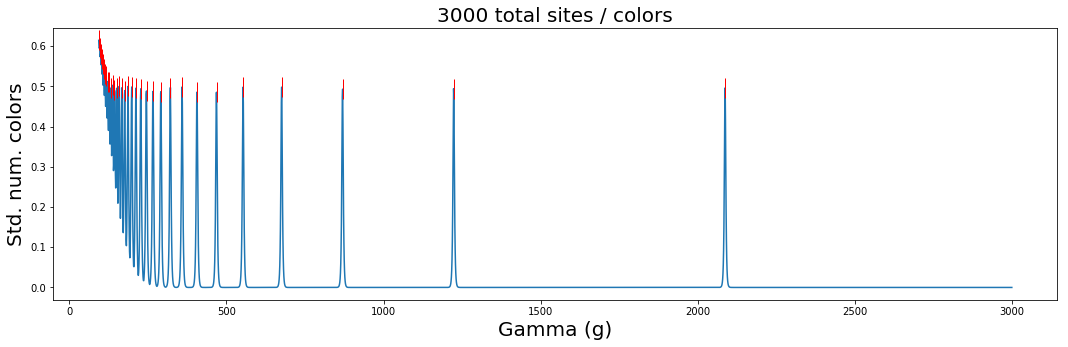

Peak locations [  94   97  100  103  106  110  114  118  122  127  132  138  144  151
  159  167  177  187  199  212  228  246  267  292  322  359  407  469
  553  676  870 1223 2087]

Normalized peaks [0.04504073 0.0464782  0.04791567 0.04935314 0.05079061 0.05270724
 0.05462386 0.05654049 0.05845712 0.0608529  0.06324868 0.06612362
 0.06899856 0.07235266 0.07618591 0.08001917 0.08481073 0.0896023
 0.09535218 0.10158122 0.10924772 0.11787254 0.12793483 0.13991375
 0.15428845 0.17201725 0.19501677 0.22472448 0.26497365 0.32390992
 0.41686632 0.58600862 1.        ]

Expectation at peak and peak+10 [(33.51834236370346, 30.174517043616817), (32.440855446248904, 29.29403544784395), (31.430753207139016, 28.476014641577535), (30.483863136036323, 27.718792674399605), (29.598317299136028, 26.9689970241885), (28.476014641577535, 26.02887224977061), (27.43789928260005, 25.13229142762105), (26.48188684319733, 24.31191108210396), (25.60990503432103, 23.628459691572534), (24.566346558579372, 22.782

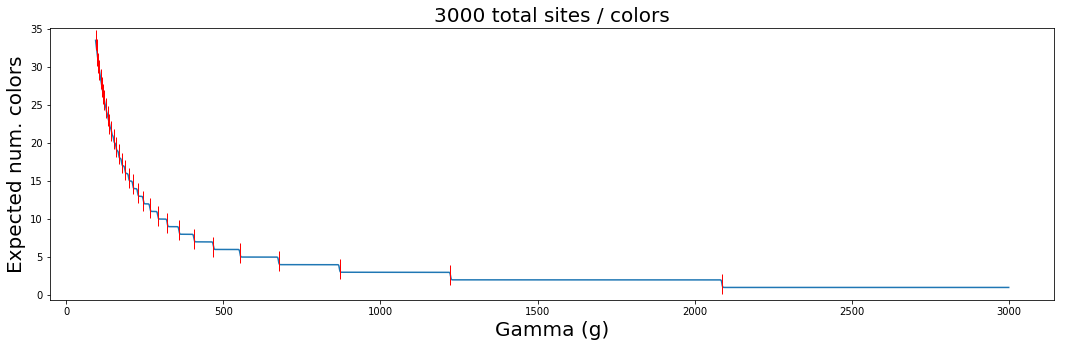

In [137]:
plot_std_colors(3000, trunc=True, save=True)
plot_avg_std_colors(3000, trunc=True, save=True)

In [141]:
plot_std_colors_S(3000, trunc=True, save=True)
plot_avg_std_colors_S(3000, trunc=True, save=True)

KeyboardInterrupt: 

Peak locations [   2  107  110  113  116  119  123  126  130  134  139  143  149  154
  160  166  173  181  189  198  208  219  231  245  260  278  298  322
  349  382  422  471  534  615  727  888 1143 1609 2746]

Normalized peaks [7.28332119e-04 3.89657684e-02 4.00582666e-02 4.11507647e-02
 4.22432629e-02 4.33357611e-02 4.47924253e-02 4.58849235e-02
 4.73415878e-02 4.87982520e-02 5.06190823e-02 5.20757465e-02
 5.42607429e-02 5.60815732e-02 5.82665696e-02 6.04515659e-02
 6.30007283e-02 6.59140568e-02 6.88273853e-02 7.21048798e-02
 7.57465404e-02 7.97523671e-02 8.41223598e-02 8.92206846e-02
 9.46831755e-02 1.01238165e-01 1.08521486e-01 1.17261471e-01
 1.27093955e-01 1.39111435e-01 1.53678077e-01 1.71522214e-01
 1.94464676e-01 2.23962127e-01 2.64748725e-01 3.23379461e-01
 4.16241806e-01 5.85943190e-01 1.00000000e+00]



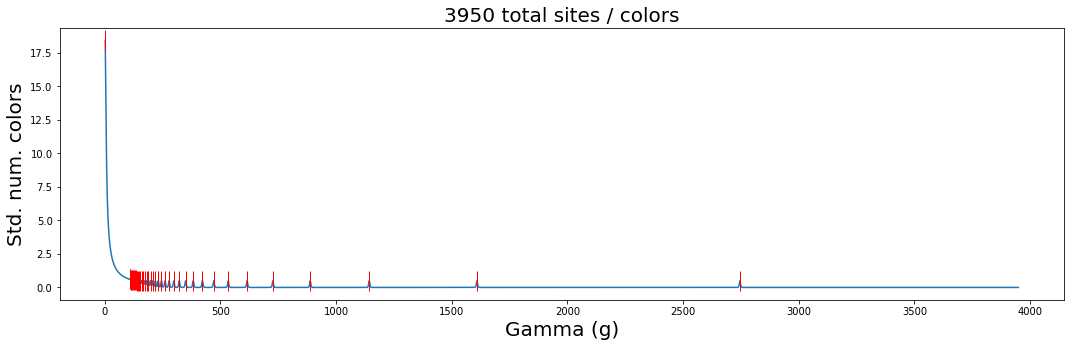

Peak locations [   2  107  110  113  116  119  123  126  130  134  139  143  149  154
  160  166  173  181  189  198  208  219  231  245  260  278  298  322
  349  382  422  471  534  615  727  888 1143 1609 2746]

Normalized peaks [7.28332119e-04 3.89657684e-02 4.00582666e-02 4.11507647e-02
 4.22432629e-02 4.33357611e-02 4.47924253e-02 4.58849235e-02
 4.73415878e-02 4.87982520e-02 5.06190823e-02 5.20757465e-02
 5.42607429e-02 5.60815732e-02 5.82665696e-02 6.04515659e-02
 6.30007283e-02 6.59140568e-02 6.88273853e-02 7.21048798e-02
 7.57465404e-02 7.97523671e-02 8.41223598e-02 8.92206846e-02
 9.46831755e-02 1.01238165e-01 1.08521486e-01 1.17261471e-01
 1.27093955e-01 1.39111435e-01 1.53678077e-01 1.71522214e-01
 1.94464676e-01 2.23962127e-01 2.64748725e-01 3.23379461e-01
 4.16241806e-01 5.85943190e-01 1.00000000e+00]

Expectation at peak and peak+10 [(1750.546374801092, 402.1549552109095), (38.58709481634939, 35.17481468017076), (37.49704149749675, 34.2631376143578), (36.4670139298657, 

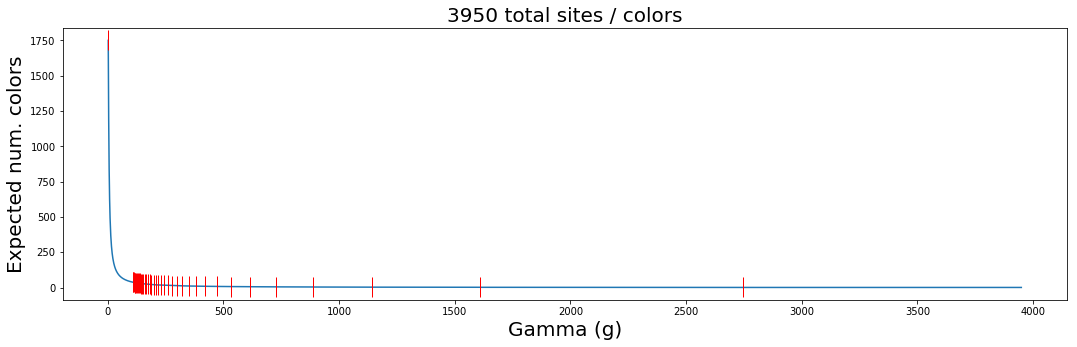

In [139]:
plot_std_colors(3950, trunc=True, save=True)
plot_avg_std_colors(3950, trunc=True, save=True)

In [ ]:
plot_std_colors_S(3950, trunc=True, save=True)
plot_avg_std_colors_S(3950, trunc=True, save=True)

In [142]:
ds = {}

# ds[64] = "[0.4375     0.60416667 1.        ]"
# ds[81] = "[0.33333333 0.43333333 0.6        1.        ]"
# ds[100] = "[0.34246575 0.43835616 0.60273973 1.        ]"
# ds[121] = "[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]"
ds[144] = "[0.24038462 0.27884615 0.33653846 0.43269231 0.59615385 1.        ]"
ds[200] = "[0.20979021 0.23776224 0.27972028 0.33566434 0.42657343 0.59440559 1.        ]"
ds[300] = "[0.16431925 0.18309859 0.20657277 0.23474178 0.27699531 0.33333333 0.42723005 0.5915493  1.        ]"
ds[500] = "[0.12215909 0.13352273 0.14488636 0.16193182 0.17897727 0.20170455 0.23011364 0.27272727 0.32954545 0.42329545 0.59090909 1.        ]"
ds[600] = "[0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739 1.        ]"
ds[700] = "[0.10590631 0.11405295 0.12219959 0.13238289 0.14460285 0.15885947 0.17718941 0.19959267 0.23014257 0.2688391  0.32790224 0.42158859 0.5885947  1.        ]"
ds[800] = "[0.09269162 0.09803922 0.10516934 0.11229947 0.12121212 0.13190731 0.14438503 0.15864528 0.17647059 0.19786096 0.22816399 0.26916221 0.32798574 0.41889483 0.58823529 1.        ]"
ds[900] = "[0.08730159 0.09206349 0.0984127  0.1047619  0.11269841 0.12063492 0.13174603 0.14285714 0.15714286 0.17619048 0.1984127  0.22857143 0.26825397 0.32698413 0.41904762 0.58888889 1.        ]"
ds[1000] = "[0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]"
ds[1200] = "[0.07398568 0.07756563 0.0823389  0.08711217 0.09188544 0.09785203 0.10381862 0.11097852 0.12052506 0.1300716  0.14200477 0.15632458 0.17422434 0.19689737 0.22673031 0.2673031  0.32577566 0.41885442 0.58830549 1.        ]"
ds[1400] = "[0.06755374 0.07062436 0.07369498 0.07778915 0.08188332 0.08597748 0.09109519 0.09723644 0.10337769 0.11054248 0.11975435 0.12998976 0.14124872 0.1555783  0.17400205 0.19651996 0.22620266 0.26714432 0.32548618 0.41862845 0.58751279 1.        ]"
ds[1600] = "[0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]"
ds[1800] = "[0.06140351 0.0645933  0.06698565 0.07017544 0.07336523 0.07735247 0.08133971 0.08532695 0.09090909 0.09649123 0.10287081 0.11004785 0.11881978 0.1291866  0.14114833 0.15550239 0.17304625 0.19617225 0.22567783 0.26634769 0.32535885 0.41786284 0.58692185 1.        ]"
ds[2000] = "[0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033 0.58650395 1.        ]"
ds[3000] = "[0.04504073 0.0464782  0.04791567 0.04935314 0.05079061 0.05270724 0.05462386 0.05654049 0.05845712 0.0608529  0.06324868 0.06612362 0.06899856 0.07235266 0.07618591 0.08001917 0.08481073 0.0896023 0.09535218 0.10158122 0.10924772 0.11787254 0.12793483 0.13991375 0.15428845 0.17201725 0.19501677 0.22472448 0.26497365 0.32390992 0.41686632 0.58600862 1.        ]"
ds[3950] = "[7.28332119e-04 3.89657684e-02 4.00582666e-02 4.11507647e-02 4.22432629e-02 4.33357611e-02 4.47924253e-02 4.58849235e-02 4.73415878e-02 4.87982520e-02 5.06190823e-02 5.20757465e-02 5.42607429e-02 5.60815732e-02 5.82665696e-02 6.04515659e-02 6.30007283e-02 6.59140568e-02 6.88273853e-02 7.21048798e-02 7.57465404e-02 7.97523671e-02 8.41223598e-02 8.92206846e-02 9.46831755e-02 1.01238165e-01 1.08521486e-01 1.17261471e-01 1.27093955e-01 1.39111435e-01 1.53678077e-01 1.71522214e-01 1.94464676e-01 2.23962127e-01 2.64748725e-01 3.23379461e-01 4.16241806e-01 5.85943190e-01 1.00000000e+00]"

for key in ds:
    ds[key] = ds[key][1:-1].strip().split(" ")
    tmp = []
    for x in ds[key]:
        if len(x)>0: tmp.append(float(x))
    ds[key] = np.array(tmp)

In [143]:
data1 = [(n,ds[n][-2]) for n in ds]
data2 = [(n,ds[n][-3]) for n in ds]
data1, data2

([(144, 0.59615385),
  (200, 0.59440559),
  (300, 0.5915493),
  (500, 0.59090909),
  (600, 0.59004739),
  (700, 0.5885947),
  (800, 0.58823529),
  (900, 0.58888889),
  (1000, 0.58798283),
  (1200, 0.58830549),
  (1400, 0.58751279),
  (1600, 0.58691756),
  (1800, 0.58692185),
  (2000, 0.58650395),
  (3000, 0.58600862),
  (3950, 0.58594319)],
 [(144, 0.43269231),
  (200, 0.42657343),
  (300, 0.42723005),
  (500, 0.42329545),
  (600, 0.42180095),
  (700, 0.42158859),
  (800, 0.41889483),
  (900, 0.41904762),
  (1000, 0.41917024),
  (1200, 0.41885442),
  (1400, 0.41862845),
  (1600, 0.41756272),
  (1800, 0.41786284),
  (2000, 0.4178033),
  (3000, 0.41686632),
  (3950, 0.416241806)])

In [145]:
from scipy.optimize import minimize

data = data2 # (x,y) values where x is N and y is the obtained value

# x = [a,b]
def objective(x):
    cost = 0
    for i in range(len(data)):
        n = data[i][0]
        cn = data[i][1]
        cost += (1/(n**x[0]) + x[1] - cn)**2
    return cost

# initial guesses
x0 = np.array([1, 0.58])
print('Initial Objective: ' + str(objective(x0)))

# optimize
solution = minimize(objective,x0)
print(solution)

sol2 = solution.x
sol2

Initial Objective: 0.4140252026799174
      fun: 1.5523809542235907e-05
 hess_inv: array([[77.48173685,  2.45323802],
       [ 2.45323802,  0.10963911]])
      jac: array([-1.69870873e-09,  1.60401873e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 8
     njev: 16
   status: 0
  success: True
        x: array([0.81944823, 0.4157817 ])


array([0.81944823, 0.4157817 ])

In [146]:
print("Sol. 1:", sol1)
print("Sol. 2:", sol2)
a1, b1 = sol1[0], sol1[1]
a2, b2 = sol2[0], sol2[1]

interp_1 = lambda x : 1/(x**a1) + b1
interp_2 = lambda x : 1/(x**a2) + b2

Sol. 1: [0.90819222 0.58607368]
Sol. 2: [0.81944823 0.4157817 ]


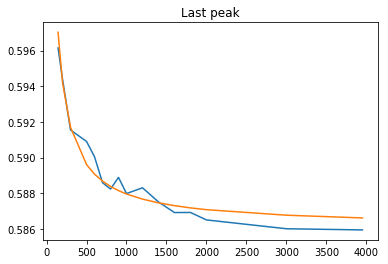

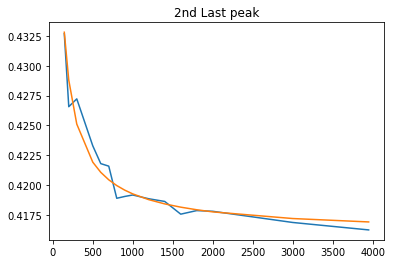

In [147]:
truex = [n for n in ds]
truey1 = [ds[n][-2] for n in ds]
intpy1 = [interp_1(n) for n in ds]
truey2 = [ds[n][-3] for n in ds]
intpy2 = [interp_2(n) for n in ds]

plt.plot(truex, truey1)
plt.plot(truex, intpy1)
plt.title("Last peak")
plt.show()
plt.plot(truex, truey2)
plt.plot(truex, intpy2)
plt.title("2nd Last peak")
plt.show()

## OLD VERSION

[17 28]
[0.60714286 1.        ]

[21 29 48]
[0.4375     0.60416667 1.        ]

[20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]

[25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]

[25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



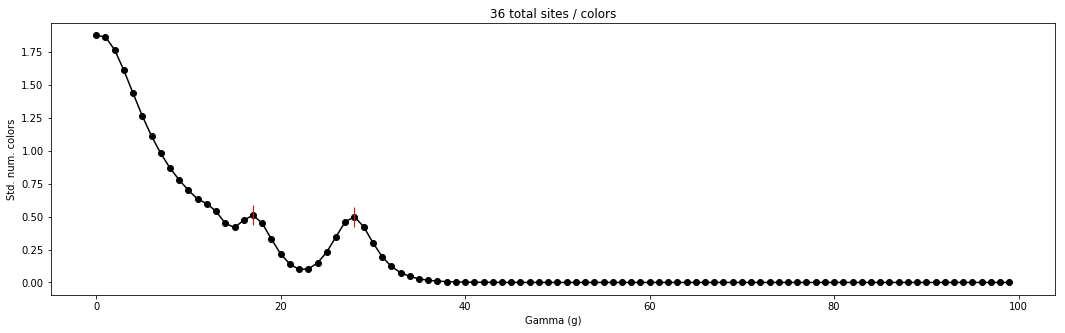

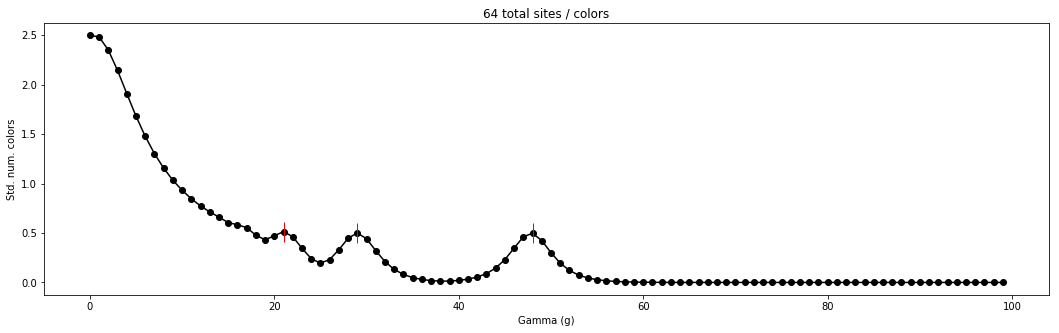

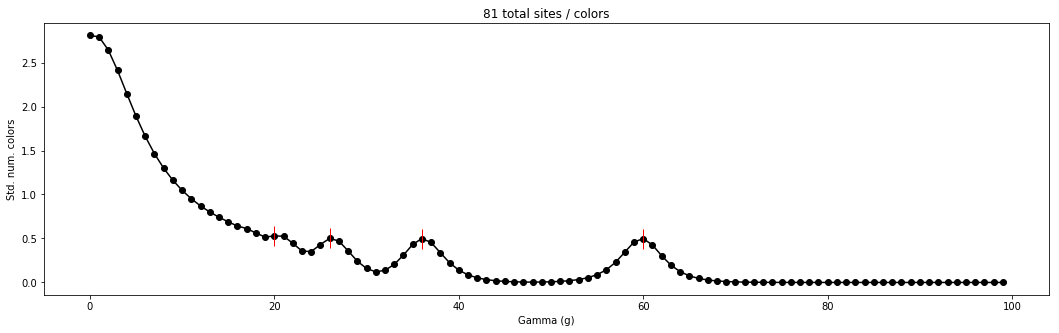

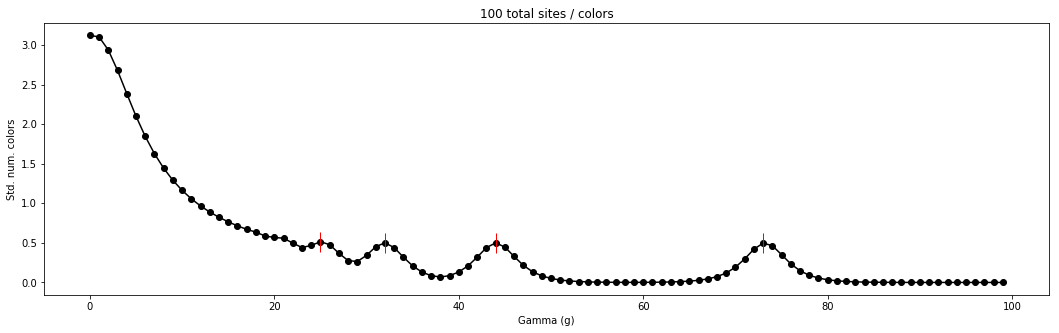

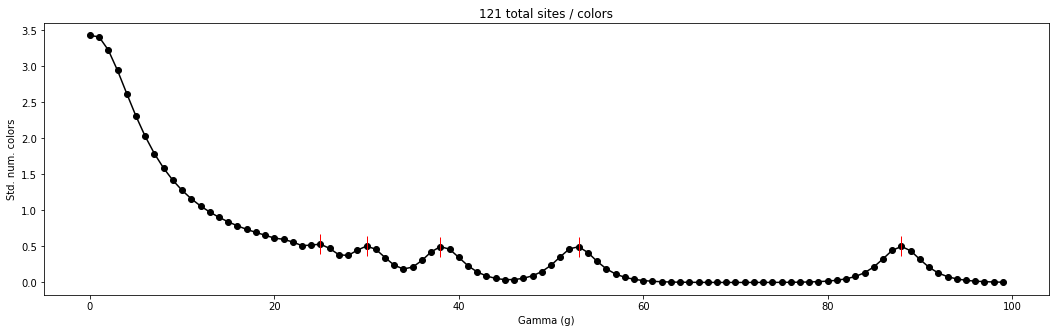

In [68]:
plot_std_colors(36)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


[0.01365924 0.60819554 1.        ]

[0.00794813 0.43965698 0.60594018 1.        ]

[0.00635133 0.34280461 0.43840883 0.60354337 1.        ]

[0.00518984 0.27779295 0.34334881 0.43635619 0.60133843 1.        ]

[0.00431965 0.28157326 0.3421621  0.43412527 0.59952256 1.        ]



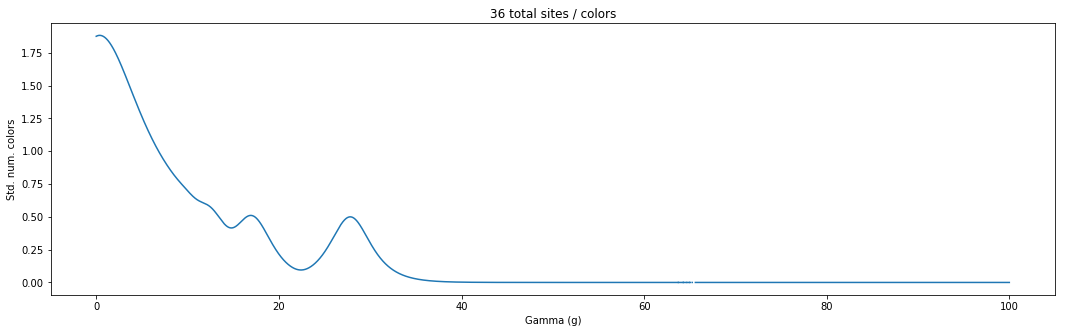

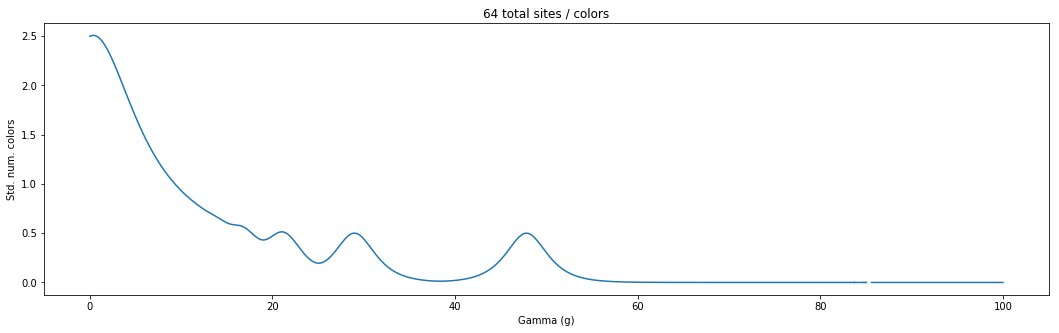

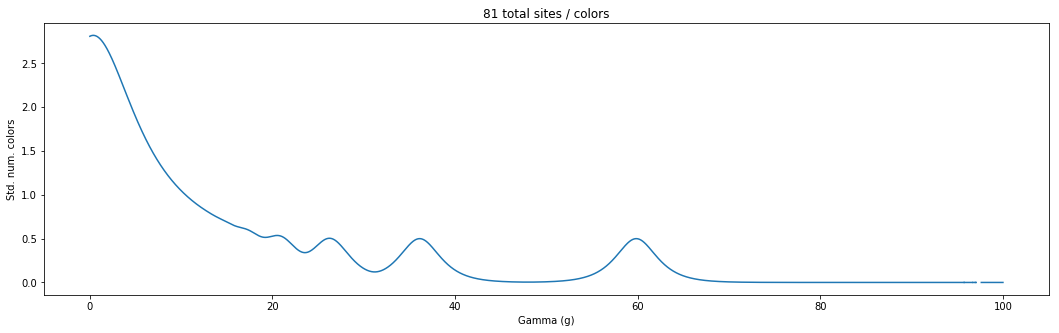

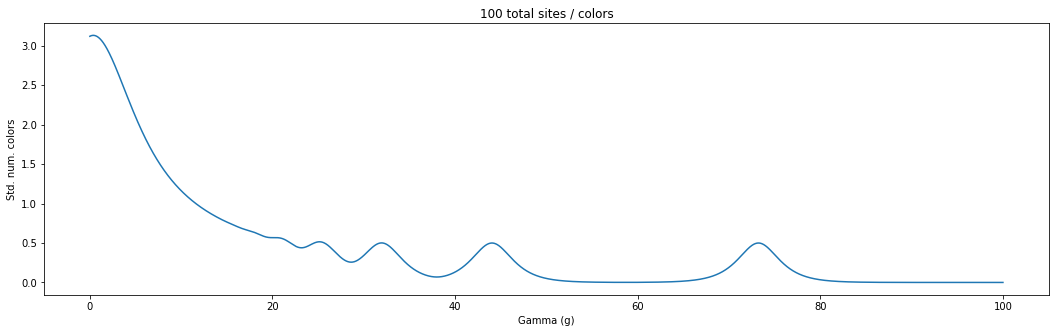

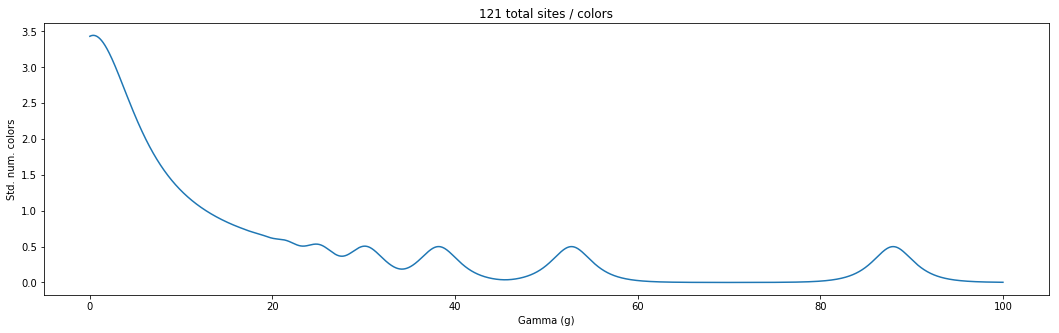

In [50]:
plot_std_colors(36)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

## Comparison of S vs C

In [112]:
print("C(4,2):", S[4][2]) #84
print("C(4,.):", S[4][:10])
print ("sum of C(4,.):", sum(S[4]))
print ("H(4,1):", H(4,1,S))
print ("H_t(4,1):", H_t(4,1,S))
print ("H_t_t(4,1):", H_t_t(4,1,S))
print ("E_cols(4,1):", E_cols(4,1,S))
print ("Var_cols(4,1):", Var_cols(4,1,S))
print ("std_cols(4,1):", std_cols(4,1,S))

C(4,2): 7
C(4,.): [0, 1, Decimal('7'), Decimal('6'), 1, 0, 0, 0, 0, 0]
sum of C(4,.): 15
H(4,1): 15
H_t(4,1): 37
H_t_t(4,1): 99
E_cols(4,1): 2.466666666666666666666666667
Var_cols(4,1): 0.515555555555555555555555554
std_cols(4,1): 0.7180219742846006


In [120]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_expected_colors_S (N, save=False):
    max_gamma = int(N*1.2)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [E_cols(N,zz,S) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(gammas, y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    if save: plt.savefig("Expected_no_colors/S_aprox_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_std_colors_S (N, trunc=False,save=False):
    max_gamma = int(N*1.2)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [float(std_cols(N,zz,S)) for zz in z]
    peaks, _ = find_peaks(y, height=0.1)
    print("Peak locations", peaks)
    print()
    pk_gammas = np.array([gammas[pk] for pk in peaks])
    print("Normalized peaks", pk_gammas/pk_gammas[-1])
    print()
    ypeaks = [y[pk] for pk in peaks]
    f = plt.figure(figsize=(18, 5))
    if trunc:
        gammas = gammas[peaks[0]:]
        y = y[peaks[0]:]
        ypeaks = [y[pk-peaks[0]] for pk in peaks]
    plt.plot(gammas, y)
    plt.plot(peaks, ypeaks, "|", c="red", ms=20)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Std. num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    trunc_s = 'trunc' if trunc else ''
    if save: plt.savefig("Expected_no_colors/S_std_aprox_(" + str(N)+","+str(N)+")_vary_gamma_" + trunc_s + ".png", format="png")
    plt.show()
    
def plot_avg_std_colors_S (N, trunc=False, save=False):
    max_gamma = int(N*1.2)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [float(E_cols(N,zz,S)) for zz in z]
    yerr = [float(std_cols(N,zz,S)) for zz in z]
    peaks, _ = find_peaks(yerr, height=0.1)
    print("Peak locations", peaks)
    print()
    pk_gammas = np.array([gammas[pk] for pk in peaks])
    print("Normalized peaks", pk_gammas/pk_gammas[-1])
    print()
    print("Expectation at peak and peak+10", [(y[pk], y[pk+10]) for pk in peaks])
    print("Std. at peak and peak+10", [(yerr[pk], yerr[pk+10]) for pk in peaks])
    ypeaks = [y[pk] for pk in peaks]
    f = plt.figure(figsize=(18, 5))
    if trunc:
        gammas = gammas[peaks[0]:]
        y = y[peaks[0]:]
        ypeaks = [y[pk-peaks[0]] for pk in peaks]
    plt.plot(gammas, y)
    plt.plot(peaks, ypeaks, "|", c="red", ms=20)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Expected num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    trunc_s = 'trunc' if trunc else ''
    if save: plt.savefig("Expected_no_colors/S_avg_std_aprox(" + str(N)+","+str(N)+")_vary_gamma_" + trunc_s + ".png", format="png")
    plt.show()

Peak locations [10]

Normalized peaks [1.]



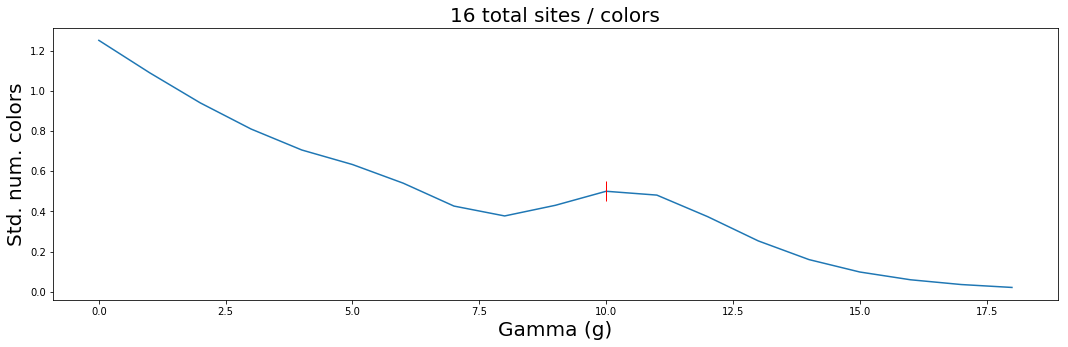

Peak locations [17]

Normalized peaks [1.]



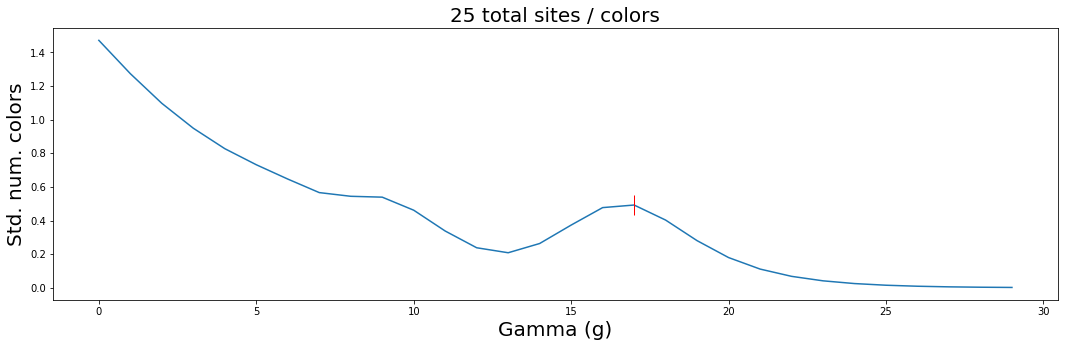

Peak locations [13 24]

Normalized peaks [0.54166667 1.        ]



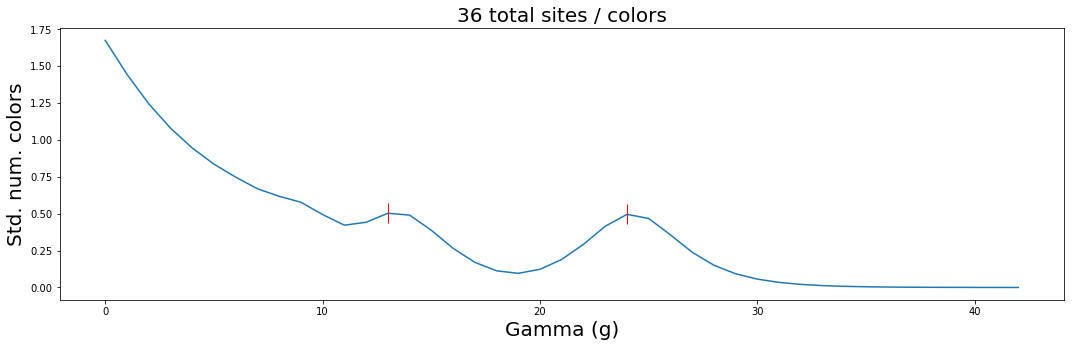

Peak locations [12 19 33]

Normalized peaks [0.36363636 0.57575758 1.        ]



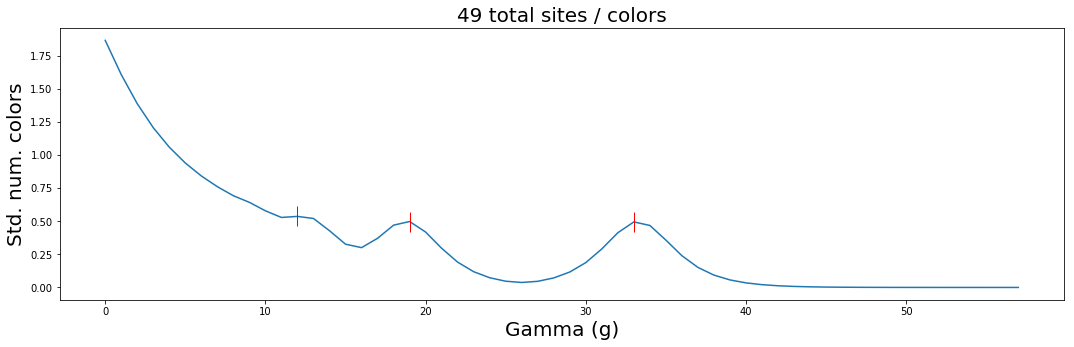

Peak locations [17 25 44]

Normalized peaks [0.38636364 0.56818182 1.        ]



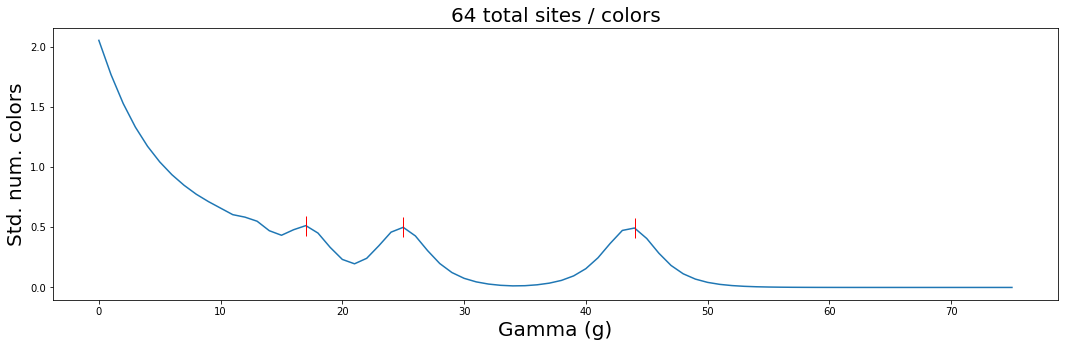

Peak locations [16 22 32 55]

Normalized peaks [0.29090909 0.4        0.58181818 1.        ]



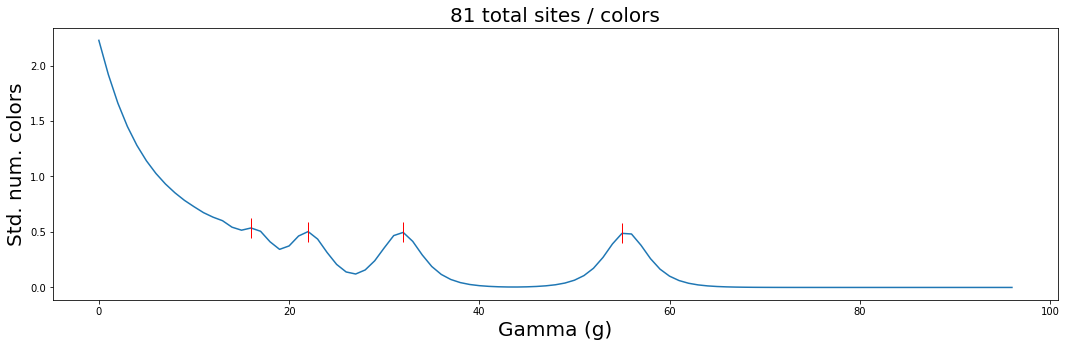

Peak locations [21 27 39 69]

Normalized peaks [0.30434783 0.39130435 0.56521739 1.        ]



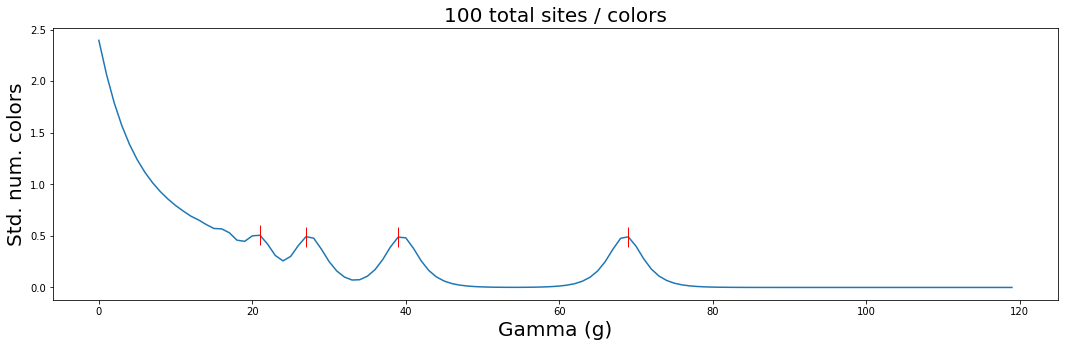

Peak locations [20 25 33 48 83]

Normalized peaks [0.24096386 0.30120482 0.39759036 0.57831325 1.        ]



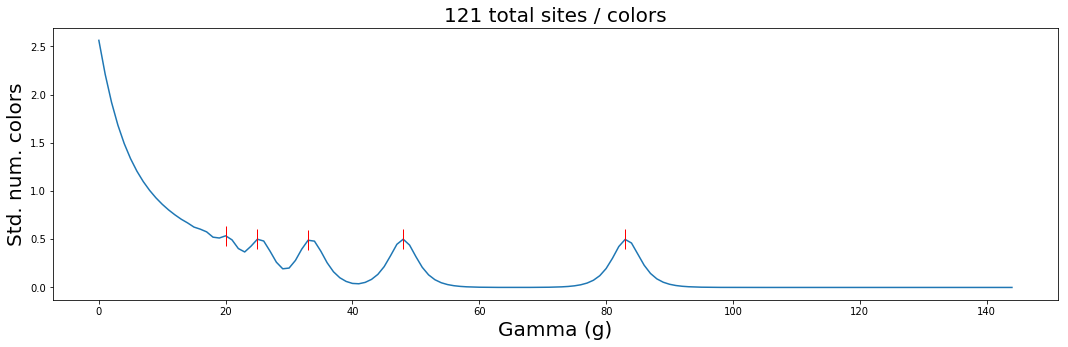

Peak locations [20 24 31 40 57 99]

Normalized peaks [0.2020202  0.24242424 0.31313131 0.4040404  0.57575758 1.        ]



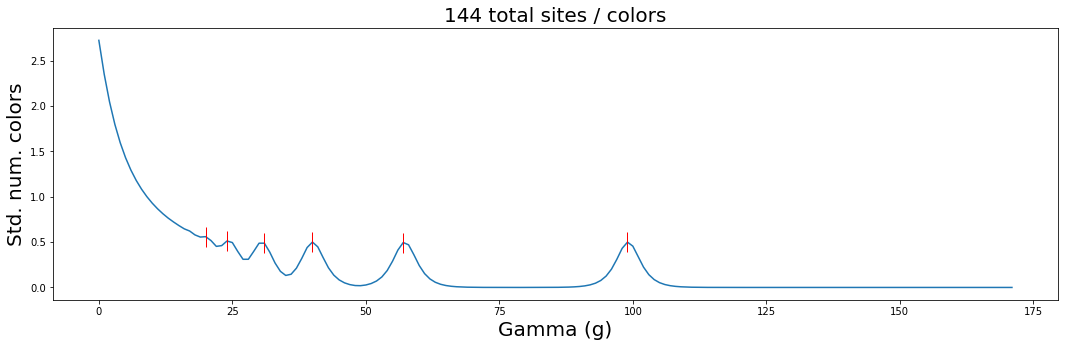

Peak locations [ 24  29  35  43  56  80 138]

Normalized peaks [0.17391304 0.21014493 0.25362319 0.3115942  0.4057971  0.57971014
 1.        ]



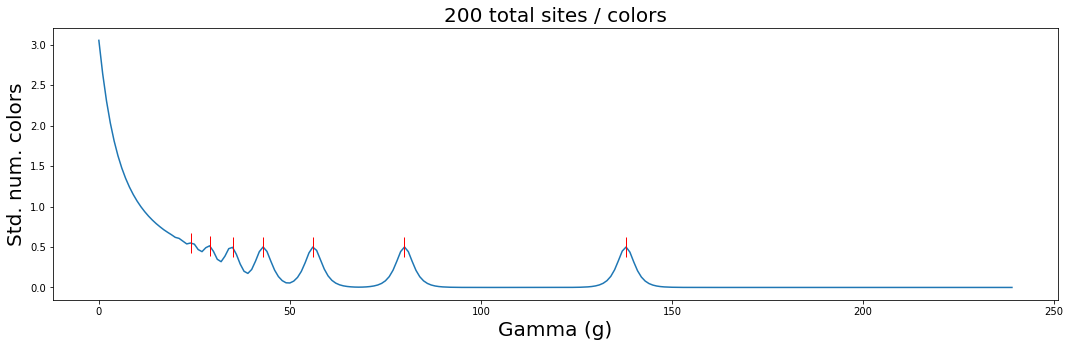

In [121]:
plot_std_colors_S(16, save=True)
plot_std_colors_S(25, save=True)
plot_std_colors_S(36, save=True)
plot_std_colors_S(49, save=True)
plot_std_colors_S(64, save=True)
plot_std_colors_S(81, save=True)
plot_std_colors_S(100, save=True)
plot_std_colors_S(121, save=True)
plot_std_colors_S(144, save=True)
plot_std_colors_S(200, save=True)